In [369]:
%matplotlib inline
import imp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
pd.set_option('display.max_columns', None)

In [370]:
import seaborn as sns; sns.set()

**Adding external data**

In [930]:
problem = imp.load_source('', 'problem.py')

In [952]:
# get training data
X_df, y_array = problem.get_train_data()
X_df.shape

(8902, 5)

In [951]:
# get test data
X_test_df, y_test_array = problem.get_test_data()
X_test_df.shape

(2226, 5)

In [1047]:
# join training and test - y
y_all = np.concatenate((y_array, y_test_array))

In [1051]:
len(y_test_array)

array([11.00826806, 10.98261462, 10.33432217, ..., 12.02997095,
        9.38164476,  8.07671268])

In [950]:
# join training and test - x
X_df_all = pd.concat([X_df,X_test_df])
X_df_all

DateOfDeparture Departure Arrival  WeeksToDeparture    std_wtd
0         2012-06-19       ORD     DFW         12.875000   9.812647
1         2012-09-10       LAS     DEN         14.285714   9.466734
2         2012-10-05       DEN     LAX         10.863636   9.035883
3         2011-10-09       ATL     ORD         11.480000   7.990202
4         2012-02-21       DEN     SFO         11.450000   9.517159
5         2013-01-22       ATL     MCO         10.363636   8.232025
6         2011-10-20       SFO     LAS         15.266667   9.808277
7         2012-01-28       EWR     ORD          8.588235   6.165010
8         2012-05-27       ATL     CLT         10.238095   6.609877
9         2013-02-22       ATL     DEN          8.294118   5.542616
10        2012-04-25       ATL     MSP         12.600000   9.725396
11        2013-01-31       ORD     EWR          8.933333   9.407191
12        2012-06-23       IAH     LAX         13.629630   9.178353
13        2011-09-12       LAX     ORD         12.807692   8.129055
14        2012-11-15       DFW     ORD          9.900000   6.608607
15        2012-03-04       ATL     DEN         10.565217   7.590820
16        2012-01-10       ORD     PHX         13.760000   9.955233
17        2013-02-13       SEA     SFO          7.000000   4.472136
18        2012-06-15       EWR     MCO         12.875000   9.665323
19        2012-02-03       ATL     MSP          9.842105   7.819230
20        2013-02-06       SFO     DEN         10.523810   7.138761
21        2011-12-02       ORD     DTW          9.833333   8.304853
22        2012-08-27       JFK     MIA         16.068966  10.347294
23        2012-04-16       PHL     DFW          6.153846   4.180234
24        2012-11-12       EWR     BOS         11.000000   8.711759
25        2011-09-08       ATL     PHL          8.684211   6.700353
26        2012-10-24       LAS     JFK         14.035714   8.971073
27        2012-04-16       ORD     EWR          8.133333   6.289068
28        2012-03-14       PHL     ATL          8.176471   6.616601
29        2012-07-24       EWR     SFO         13.960000  10.921996
...              ...       ...     ...               ...        ...
2196      2012-04-12       ORD     LAS         12.090909  10.037592
2197      2011-09-14       MIA     ATL         10.956522   8.098699
2198      2011-11-14       ORD     SEA         11.500000   9.738241
2199      2012-07-24       BOS     LGA          6.153846   4.140172
2200      2012-02-13       ORD     IAH          8.533333   6.390469
2201      2012-01-09       ORD     LAS         15.241379  10.507328
2202      2013-01-30       SEA     ORD         10.055556   7.336229
2203      2013-01-03       MCO     EWR         15.310345  10.525830
2204      2012-10-02       ATL     DTW          9.055556   9.276613
2205      2011-12-16       IAH     LAX         13.375000  10.412419
2206      2012-03-27       BOS     LAX          8.062500   5.615084
2207      2012-07-08       DTW     ATL         11.590909   9.723115
2208      2012-05-26       DTW     LGA          8.000000   5.887841
2209      2012-06-07       EWR     SFO         12.500000  11.123706
2210      2013-01-13       PHL     DFW          8.529412   6.022018
2211      2012-10-02       LAX     DEN         13.181818  11.607208
2212      2012-10-02       ORD     DFW         14.629630  10.709981
2213      2012-04-17       ATL     DTW          8.066667   6.363587
2214      2012-07-03       SFO     LAX         10.434783   7.584830
2215      2012-12-23       PHL     ATL          9.315789   6.289786
2216      2012-02-05       DEN     MSP         11.391304   8.669377
2217      2012-11-10       LAS     LAX         17.000000  11.757654
2218      2012-08-26       LGA     MIA         12.130435   9.987740
2219      2012-05-14       LAX     DFW         12.173913   8.611051
2220      2013-02-05       ORD     EWR          8.727273  10.583864
2221      2011-11-24       DEN     PHX         11.045455   7.791798
2222      2012-09-01       ATL     DEN         11.000000   7.

In [954]:
# check
X_df_all['Arrival'].unique()

array(['DFW', 'DEN', 'LAX', 'ORD', 'SFO', 'MCO', 'LAS', 'CLT', 'MSP',
       'EWR', 'PHX', 'DTW', 'MIA', 'BOS', 'PHL', 'JFK', 'ATL', 'LGA',
       'SEA', 'IAH'], dtype=object)

**Airport locations**

Obtained from [openflights.org](https://openflights.org/data.html). Gives latitute, longitude and city name of each airport.

In [955]:
ap = pd.read_csv("data/airports.dat", index_col=0, header=None)
ap.head()

1             2   \
0                                                              
1                               Goroka Airport        Goroka   
2                               Madang Airport        Madang   
3                 Mount Hagen Kagamuga Airport   Mount Hagen   
4                               Nadzab Airport        Nadzab   
5  Port Moresby Jacksons International Airport  Port Moresby   

                 3    4     5         6           7     8   9  10  \
0                                                                   
1  Papua New Guinea  GKA  AYGA -6.081690  145.391998  5282  10  U   
2  Papua New Guinea  MAG  AYMD -5.207080  145.789001    20  10  U   
3  Papua New Guinea  HGU  AYMH -5.826790  144.296005  5388  10  U   
4  Papua New Guinea  LAE  AYNZ -6.569803  146.725977   239  10  U   
5  Papua New Guinea  POM  AYPY -9.443380  147.220001   146  10  U   

                     11       12           13  
0                                              
1  Pacific/Port_Moresby  airport  OurAirports  
2  Pacific/Port_Moresby  airport  OurAirports  
3  Pacific/Port_Moresby  airport  OurAirports  
4  Pacific/Port_Moresby  airport  OurAirports  
5  Pacific/Port_Moresby  airport  OurAirports

In [956]:
# check airports of interest are contained in data
sum(ap[4].isin(X_df_all['Departure'].unique()))

20

In [957]:
# subset
ap2 = ap[[2,4,6,7]]
ap2.columns = ['City', 'IATA', 'Lat', 'Long']
ap2

City IATA        Lat        Long
0                                                    
1                  Goroka  GKA  -6.081690  145.391998
2                  Madang  MAG  -5.207080  145.789001
3             Mount Hagen  HGU  -5.826790  144.296005
4                  Nadzab  LAE  -6.569803  146.725977
5            Port Moresby  POM  -9.443380  147.220001
6                   Wewak  WWK  -3.583830  143.669006
7            Narssarssuaq  UAK  61.160500  -45.425999
8                Godthaab  GOH  64.190903  -51.678101
9             Sondrestrom  SFJ  67.012222  -50.711603
10                  Thule  THU  76.531197  -68.703201
11               Akureyri  AEY  65.660004  -18.072701
12            Egilsstadir  EGS  65.283302  -14.401400
13                   Hofn  HFN  64.295601  -15.227200
14                Husavik  HZK  65.952301  -17.426001
15             Isafjordur  IFJ  66.058098  -23.135300
16               Keflavik  KEF  63.985001  -22.605600
17         Patreksfjordur  PFJ  65.555801  -23.965000
18              Reykjavik  RKV  64.129997  -21.940599
19           Siglufjordur  SIJ  66.133301  -18.916700
20         Vestmannaeyjar  VEY  63.424301  -20.278900
21     Sault Sainte Marie  YAM  46.485001  -84.509399
22               Winnipeg   \N  50.056400  -97.032501
23                Halifax   \N  44.639702  -63.499401
24            St. Anthony  YAY  51.391899  -56.083099
25                 Tofino  YAZ  49.079833 -125.775583
26              Pelly Bay  YBB  68.534401  -89.808098
27            Baie Comeau  YBC  49.132500  -68.204399
28             Bagotville  YBG  48.330601  -70.996399
29             Baker Lake  YBK  64.298897  -96.077797
30         Campbell River  YBL  49.950802 -125.271004
...                   ...  ...        ...         ...
13636             Jundiai   \N -23.180369  -46.944408
13642    Berkeley Springs   \N  39.692600  -78.166100
13643       Foz Do Iguacu   \N -25.613056  -54.398056
13647               Brits   \N -25.532301   27.775900
13648         West Melton   \N -43.476700  172.397003
13649            Rangiora   \N -43.290001  172.542007
13668                JARU   \N -10.423611  -62.517500
13669  MACHADINHO D'OESTE   \N  -9.403611  -62.008056
13671          Noonkanbah  NKB -18.494699  124.851997
13681                Uzyn   \N  49.790600   30.441401
13683          COTRIGUACU   \N  -9.904444  -58.582168
13687              Kasese  KSE   0.183000   30.100000
13694       Bay St. Louis   \N  30.367800  -89.454597
13707            Seldovia  SOV  59.442402 -151.703995
13711           Lutselk'e  YSG  62.418303 -110.681998
13712             Engeløy   \N  67.967222   14.992500
13713             Dwangwa  DWA -12.518300   34.131901
13714             Higleig  HGI  10.529167   32.500556
13715             Jackson   \N  37.593899  -83.317299
13716            Beaufort   \N  32.477402  -80.723198
13717           Oceanside   \N  33.301300 -117.355003
13718      Castelo Branco   \N  39.847022   -7.441110
13719        Ponte de Sôr   \N  39.211559   -8.056542
13720                Maia   \N  41.277290   -8.516207
13721                 NaN   \N  23.011194  -74.905889
13722           Kenebetsu   \N  43.425154  144.741354
13723               Natal   \N  -5.911420  -35.247700
13724               Ajmer  KQH  26.601473   74.814147
13725              Kannur  CNN  11.918614   75.547211
13726             Beijing   \N  39.960800  116.257004

[7543 rows x 4 columns]

In [959]:
# merge arrival city details
X_df2 = pd.merge(X_df_all, ap2, how = 'left',
                left_on=['Arrival'],
                right_on=['IATA'],
                sort=False).drop('IATA', axis=1)
X_df2.head()

DateOfDeparture Departure Arrival  WeeksToDeparture   std_wtd  \
0      2012-06-19       ORD     DFW         12.875000  9.812647   
1      2012-09-10       LAS     DEN         14.285714  9.466734   
2      2012-10-05       DEN     LAX         10.863636  9.035883   
3      2011-10-09       ATL     ORD         11.480000  7.990202   
4      2012-02-21       DEN     SFO         11.450000  9.517159   

                City        Lat        Long  
0  Dallas-Fort Worth  32.896801  -97.038002  
1             Denver  39.861698 -104.672997  
2        Los Angeles  33.942501 -118.407997  
3            Chicago  41.978600  -87.904800  
4      San Francisco  37.618999 -122.375000

ref: [SO](https://stackoverflow.com/questions/38101009/changing-multiple-column-names-but-not-all-of-them-pandas-python)

In [960]:
# (I just wanted to rename the columns without having to type them out)
# Specify location data is for arrival airport
X_df2.rename(columns = dict(zip(X_df2.columns[-3:], ['A_' + colname for colname in X_df2.columns[-3:]])), 
             inplace = True)
X_df2.head()

DateOfDeparture Departure Arrival  WeeksToDeparture   std_wtd  \
0      2012-06-19       ORD     DFW         12.875000  9.812647   
1      2012-09-10       LAS     DEN         14.285714  9.466734   
2      2012-10-05       DEN     LAX         10.863636  9.035883   
3      2011-10-09       ATL     ORD         11.480000  7.990202   
4      2012-02-21       DEN     SFO         11.450000  9.517159   

              A_City      A_Lat      A_Long  
0  Dallas-Fort Worth  32.896801  -97.038002  
1             Denver  39.861698 -104.672997  
2        Los Angeles  33.942501 -118.407997  
3            Chicago  41.978600  -87.904800  
4      San Francisco  37.618999 -122.375000

In [961]:
# merge departure city details
X_df2 = pd.merge(X_df2, ap2, how = 'left',
                left_on=['Departure'],
                right_on=['IATA'],
                sort=False).drop('IATA', axis=1)
X_df2.head()

DateOfDeparture Departure Arrival  WeeksToDeparture   std_wtd  \
0      2012-06-19       ORD     DFW         12.875000  9.812647   
1      2012-09-10       LAS     DEN         14.285714  9.466734   
2      2012-10-05       DEN     LAX         10.863636  9.035883   
3      2011-10-09       ATL     ORD         11.480000  7.990202   
4      2012-02-21       DEN     SFO         11.450000  9.517159   

              A_City      A_Lat      A_Long       City        Lat        Long  
0  Dallas-Fort Worth  32.896801  -97.038002    Chicago  41.978600  -87.904800  
1             Denver  39.861698 -104.672997  Las Vegas  36.080101 -115.152000  
2        Los Angeles  33.942501 -118.407997     Denver  39.861698 -104.672997  
3            Chicago  41.978600  -87.904800    Atlanta  33.636700  -84.428101  
4      San Francisco  37.618999 -122.375000     Denver  39.861698 -104.672997

In [962]:
# rename columns
X_df2.rename(columns = dict(zip(X_df2.columns[-3:], ['D_' + colname for colname in X_df2.columns[-3:]])), 
             inplace = True)
X_df2.head()

DateOfDeparture Departure Arrival  WeeksToDeparture   std_wtd  \
0      2012-06-19       ORD     DFW         12.875000  9.812647   
1      2012-09-10       LAS     DEN         14.285714  9.466734   
2      2012-10-05       DEN     LAX         10.863636  9.035883   
3      2011-10-09       ATL     ORD         11.480000  7.990202   
4      2012-02-21       DEN     SFO         11.450000  9.517159   

              A_City      A_Lat      A_Long     D_City      D_Lat      D_Long  
0  Dallas-Fort Worth  32.896801  -97.038002    Chicago  41.978600  -87.904800  
1             Denver  39.861698 -104.672997  Las Vegas  36.080101 -115.152000  
2        Los Angeles  33.942501 -118.407997     Denver  39.861698 -104.672997  
3            Chicago  41.978600  -87.904800    Atlanta  33.636700  -84.428101  
4      San Francisco  37.618999 -122.375000     Denver  39.861698 -104.672997

**Distance**

Calculate distance between airports. Use approx formula from [here](https://www.movable-type.co.uk/scripts/latlong.html).

In [41]:
lat1 = -6.081690
long1 = 145.391998
lat2 = 5.207080
long2 = 145.789001

In [963]:
def calc_dist(lat1, long1, lat2, long2):
    
#     lat1 = df['D_Lat']
#     long1 = df['D_Long']
#     lat2 = df['A_Lat']
#     long2 = df['A_Long']
    
    latdiff = math.radians(lat2 - lat1)
    longdif = math.radians(long2 - long1)

    a = math.sin(latdiff/2)**2 + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(longdif/2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = 6371 * c
    
    return d



Ref: [SO](https://stackoverflow.com/questions/19914937/applying-function-with-multiple-arguments-to-create-a-new-pandas-column)

In [964]:
# add distance column
X_df2['Distance'] = np.vectorize(calc_dist)(X_df2['D_Lat'], X_df2['D_Long'], X_df2['A_Lat'], X_df2['A_Long'])

In [138]:
X_df2.head()

DateOfDeparture Departure Arrival  WeeksToDeparture    std_wtd  \
0         2012-06-19       ORD     DFW         12.875000   9.812647   
1         2012-09-10       LAS     DEN         14.285714   9.466734   
2         2012-10-05       DEN     LAX         10.863636   9.035883   
3         2011-10-09       ATL     ORD         11.480000   7.990202   
4         2012-02-21       DEN     SFO         11.450000   9.517159   
5         2013-01-22       ATL     MCO         10.363636   8.232025   
6         2011-10-20       SFO     LAS         15.266667   9.808277   
7         2012-01-28       EWR     ORD          8.588235   6.165010   
8         2012-05-27       ATL     CLT         10.238095   6.609877   
9         2013-02-22       ATL     DEN          8.294118   5.542616   
10        2012-04-25       ATL     MSP         12.600000   9.725396   
11        2013-01-31       ORD     EWR          8.933333   9.407191   
12        2012-06-23       IAH     LAX         13.629630   9.178353   
13        2011-09-12       LAX     ORD         12.807692   8.129055   
14        2012-11-15       DFW     ORD          9.900000   6.608607   
15        2012-03-04       ATL     DEN         10.565217   7.590820   
16        2012-01-10       ORD     PHX         13.760000   9.955233   
17        2013-02-13       SEA     SFO          7.000000   4.472136   
18        2012-06-15       EWR     MCO         12.875000   9.665323   
19        2012-02-03       ATL     MSP          9.842105   7.819230   
20        2013-02-06       SFO     DEN         10.523810   7.138761   
21        2011-12-02       ORD     DTW          9.833333   8.304853   
22        2012-08-27       JFK     MIA         16.068966  10.347294   
23        2012-04-16       PHL     DFW          6.153846   4.180234   
24        2012-11-12       EWR     BOS         11.000000   8.711759   
25        2011-09-08       ATL     PHL          8.684211   6.700353   
26        2012-10-24       LAS     JFK         14.035714   8.971073   
27        2012-04-16       ORD     EWR          8.133333   6.289068   
28        2012-03-14       PHL     ATL          8.176471   6.616601   
29        2012-07-24       EWR     SFO         13.960000  10.921996   
...              ...       ...     ...               ...        ...   
8872      2012-07-07       ATL     DEN         14.208333  11.057082   
8873      2012-03-25       JFK     MIA         14.192308  10.248977   
8874      2011-11-23       CLT     ATL          8.944444   5.985003   
8875      2012-06-18       ATL     MCO         14.304348  12.700876   
8876      2012-12-10       ATL     DEN          8.235294   7.611910   
8877      2012-07-23       ORD     BOS         11.125000   7.792485   
8878      2012-08-30       JFK     LAX         16.181818  11.541920   
8879      2012-05-30       EWR     MCO         11.913043   8.696462   
8880      2012-04-27       ORD     BOS         13.080000   9.091755   
8881      2013-01-27       JFK     LAS         12.708333   9.317954   
8882      2012-09-20       SEA     SFO         14.000000  11.131786   
8883      2012-11-03       SFO     LAS         15.615385  11.950153   
8884      2012-06-16       DEN     SFO         11.173913   7.068832   
8885      2012-12-12       IAH     LAX         13.240000  11.140317   
8886      2012-06-21       SFO     DEN         12.695652   9.546226   
8887      2012-01-20       JFK     SFO         11.833333   9.448564   
8888      2012-04-16       JFK     SFO         14.576923  11.552223   
8889      2012-12-04       ORD     EWR          9.823529   8.048566   
8890      2012-04-08       LGA     ATL         10.476190   7.131753   
8891      2013-02-19       ORD     MSP          8.625000   6.333772   
8892      2012-07-19       SFO     EWR         12.363636  10.759472   
8893      2011-10-21       ORD     DEN          8.500000   5.338539   
8894      2012-10-25       ORD     LAX         14.000000  10.743215   
8895      2012-06-02       ORD     PHL          9.473684   6.501012   
8896      2012-02-02       JF

**Route information**

Information about the types of planes used for each route, for each airline that flies that route.
Obtained from [openflights.org](https://openflights.org/data.html)

In [965]:
plane = pd.read_csv("data/routes.dat", header=None)
plane

0      1    2     3    4     5    6  7    8
0      2B    410  AER  2965  KZN  2990  NaN  0  CR2
1      2B    410  ASF  2966  KZN  2990  NaN  0  CR2
2      2B    410  ASF  2966  MRV  2962  NaN  0  CR2
3      2B    410  CEK  2968  KZN  2990  NaN  0  CR2
4      2B    410  CEK  2968  OVB  4078  NaN  0  CR2
5      2B    410  DME  4029  KZN  2990  NaN  0  CR2
6      2B    410  DME  4029  NBC  6969  NaN  0  CR2
7      2B    410  DME  4029  TGK    \N  NaN  0  CR2
8      2B    410  DME  4029  UUA  6160  NaN  0  CR2
9      2B    410  EGO  6156  KGD  2952  NaN  0  CR2
10     2B    410  EGO  6156  KZN  2990  NaN  0  CR2
11     2B    410  GYD  2922  NBC  6969  NaN  0  CR2
12     2B    410  KGD  2952  EGO  6156  NaN  0  CR2
13     2B    410  KZN  2990  AER  2965  NaN  0  CR2
14     2B    410  KZN  2990  ASF  2966  NaN  0  CR2
15     2B    410  KZN  2990  CEK  2968  NaN  0  CR2
16     2B    410  KZN  2990  DME  4029  NaN  0  CR2
17     2B    410  KZN  2990  EGO  6156  NaN  0  CR2
18     2B    410  KZN  2990  LED  2948  NaN  0  CR2
19     2B    410  KZN  2990  SVX  2975  NaN  0  CR2
20     2B    410  LED  2948  KZN  2990  NaN  0  CR2
21     2B    410  LED  2948  NBC  6969  NaN  0  CR2
22     2B    410  LED  2948  UUA  6160  NaN  0  CR2
23     2B    410  MRV  2962  ASF  2966  NaN  0  CR2
24     2B    410  NBC  6969  DME  4029  NaN  0  CR2
25     2B    410  NBC  6969  GYD  2922  NaN  0  CR2
26     2B    410  NBC  6969  LED  2948  NaN  0  CR2
27     2B    410  NBC  6969  SVX  2975  NaN  0  CR2
28     2B    410  NJC  2972  SVX  2975  NaN  0  CR2
29     2B    410  NJC  2972  UUA  6160  NaN  0  CR2
...    ..    ...  ...   ...  ...   ...  ... ..  ...
67633  ZL   4178  SYD  3361  ABX  3333  NaN  0  SF3
67634  ZL   4178  SYD  3361  ARM  4062  NaN  0  SF3
67635  ZL   4178  SYD  3361  BHQ  6241  NaN  0  SF3
67636  ZL   4178  SYD  3361  BHS  6249  NaN  0  SF3
67637  ZL   4178  SYD  3361  BNK  4291  NaN  0  SF3
67638  ZL   4178  SYD  3361  DBO  3358  NaN  0  SF3
67639  ZL   4178  SYD  3361  GFF  6271  NaN  0  SF3
67640  ZL   4178  SYD  3361  LSY  6287  NaN  0  SF3
67641  ZL   4178  SYD  3361  MIM  6294  NaN  0  SF3
67642  ZL   4178  SYD  3361  MQL  6298  NaN  0  SF3
67643  ZL   4178  SYD  3361  MYA  6302  NaN  0  SF3
67644  ZL   4178  SYD  3361  NRA  6307  NaN  0  SF3
67645  ZL   4178  SYD  3361  NTL  4320  NaN  0  SF3
67646  ZL   4178  SYD  3361  OAG  6793  NaN  0  SF3
67647  ZL   4178  SYD  3361  PKE  6317  NaN  0  SF3
67648  ZL   4178  SYD  3361  TRO  6794  NaN  0  SF3
67649  ZL   4178  SYD  3361  WGA  3363  NaN  0  SF3
67650  ZL   4178  TRO  6794  GFN  6792  NaN  0  SF3
67651  ZL   4178  TRO  6794  SYD  3361  NaN  0  SF3
67652  ZL   4178  TSV  3330  ISA  3324  NaN  0  SF3
67653  ZL   4178  TSV  3330  WIN  6337  NaN  0  SF3
67654  ZL   4178  WGA  3363  MEL  3339  NaN  0  SF3
67655  ZL   4178  WGA  3363  SYD  3361  NaN  0  SF3
67656  ZL   4178  WIN  6337  LRE  6289  NaN  0  SF3
67657  ZL   4178  WIN  6337  TSV  3330  NaN  0  SF3
67658  ZL   4178  WYA  6334  ADL  3341  NaN  0  SF3
67659  ZM  19016  DME  4029  FRU  2912  NaN  0  734
67660  ZM  19016  FRU  2912  DME  4029  NaN  0  734
67661  ZM  19016  FRU  2912  OSS  2913  NaN  0  734
67662  ZM  19016  OSS  2913  FRU  2912  NaN  0  734

[67663 rows x 9 columns]

In [966]:
# subset only necessary columns
plane = plane[[0,2,4,7,8]]
plane.columns = ['Airline','D_IATA', 'A_IATA', 'Stops', 'Plane']
plane.head()

Airline D_IATA A_IATA  Stops Plane
0      2B    AER    KZN      0   CR2
1      2B    ASF    KZN      0   CR2
2      2B    ASF    MRV      0   CR2
3      2B    CEK    KZN      0   CR2
4      2B    CEK    OVB      0   CR2

In [967]:
X_df3 = X_df2.copy()

In [968]:
# get df of all unique routes
all_routes = X_df3.groupby(['Departure','Arrival']).size().reset_index()
all_routes.head()

Departure Arrival    0
0       ATL     BOS  101
1       ATL     CLT   92
2       ATL     DEN   84
3       ATL     DFW   83
4       ATL     DTW   86

In [969]:
# merge unique routes with plane/airline data
all_routes_plane = pd.merge(all_routes, plane, how = 'left',
                left_on=['Departure', 'Arrival'],
                right_on=['D_IATA','A_IATA'])

In [748]:
all_routes_plane

Departure Arrival   0 Airline D_IATA A_IATA  Stops  \
0         ATL     BOS  87      AF    ATL    BOS      0   
1         ATL     BOS  87      AM    ATL    BOS      0   
2         ATL     BOS  87      AZ    ATL    BOS      0   
3         ATL     BOS  87      DL    ATL    BOS      0   
4         ATL     BOS  87      FL    ATL    BOS      0   
5         ATL     BOS  87      KL    ATL    BOS      0   
6         ATL     BOS  87      VS    ATL    BOS      0   
7         ATL     BOS  87      WN    ATL    BOS      0   
8         ATL     CLT  80      AA    ATL    CLT      0   
9         ATL     CLT  80      AF    ATL    CLT      0   
10        ATL     CLT  80      AS    ATL    CLT      0   
11        ATL     CLT  80      AZ    ATL    CLT      0   
12        ATL     CLT  80      DL    ATL    CLT      0   
13        ATL     CLT  80      KL    ATL    CLT      0   
14        ATL     CLT  80      US    ATL    CLT      0   
15        ATL     CLT  80      VS    ATL    CLT      0   
16        ATL     DEN  60      AC    ATL    DEN      0   
17        ATL     DEN  60      AF    ATL    DEN      0   
18        ATL     DEN  60      AM    ATL    DEN      0   
19        ATL     DEN  60      AZ    ATL    DEN      0   
20        ATL     DEN  60      DL    ATL    DEN      0   
21        ATL     DEN  60      F9    ATL    DEN      0   
22        ATL     DEN  60      FL    ATL    DEN      0   
23        ATL     DEN  60      KL    ATL    DEN      0   
24        ATL     DEN  60      UA    ATL    DEN      0   
25        ATL     DEN  60      VS    ATL    DEN      0   
26        ATL     DEN  60      WN    ATL    DEN      0   
27        ATL     DFW  60      AA    ATL    DFW      0   
28        ATL     DFW  60      AF    ATL    DFW      0   
29        ATL     DFW  60      AZ    ATL    DFW      0   
..        ...     ...  ..     ...    ...    ...    ...   
686       SFO     EWR  59      VX    SFO    EWR      0   
687       SFO     JFK  69      AA    SFO    JFK      0   
688       SFO     JFK  69      AS    SFO    JFK      0   
689       SFO     JFK  69      B6    SFO    JFK      0   
690       SFO     JFK  69      DL    SFO    JFK      0   
691       SFO     JFK  69      UA    SFO    JFK      0   
692       SFO     JFK  69      US    SFO    JFK      0   
693       SFO     JFK  69      VX    SFO    JFK      0   
694       SFO     LAS  81      HA    SFO    LAS      0   
695       SFO     LAS  81      UA    SFO    LAS      0   
696       SFO     LAS  81      VX    SFO    LAS      0   
697       SFO     LAS  81      WN    SFO    LAS      0   
698       SFO     LAX  71      AA    SFO    LAX      0   
699       SFO     LAX  71      AS    SFO    LAX      0   
700       SFO     LAX  71      DL    SFO    LAX      0   
701       SFO     LAX  71      UA    SFO    LAX      0   
702       SFO     LAX  71      US    SFO    LAX      0   
703       SFO     LAX  71      VX    SFO    LAX      0   
704       SFO     LAX  71      WN    SFO    LAX      0   
705       SFO     ORD  70      AA    SFO    ORD      0   
706       SFO     ORD  70      AS    SFO    ORD      0   
707       SFO     ORD  70      UA    SFO    ORD      0   
708       SFO     ORD  70      US    SFO    ORD      0   
709       SFO     ORD  70      VX    SFO    ORD      0   
710       SFO     SEA  69      AA    SFO    SEA      0   
711       SFO     SEA  69      AS    SFO    SEA      0   
712       SFO     SEA  69      DL    SFO    SEA      0   
713       SFO     SEA  69      KL    SFO    SEA      0   
714       SFO     SEA  69      UA    SFO    SEA      0   
715       SFO     SEA  69      VX    SFO    SEA      0   

                               Plane  
0                M90 757 320 738 319  
1            M90 757 738 M88 320 319  
2                        M90 757 319  
3           M90 757 320 738 M88  319  
4                                717  
5                        757 320 319  
6            M90 757 320 738 M88 319  
7                                73W  
8                    319 320 CR9 321  
9                

In [970]:
# each route has multiple airlines serving it - add this as a variable
num_airlines = all_routes_plane.groupby(['Departure','Arrival']).size().reset_index().rename(columns={0:'num_airlines'})
num_airlines
# to be merged later...

Departure Arrival  num_airlines
0         ATL     BOS             8
1         ATL     CLT             8
2         ATL     DEN            11
3         ATL     DFW            11
4         ATL     DTW             8
5         ATL     EWR             7
6         ATL     LAX            10
7         ATL     LGA             8
8         ATL     MCO             8
9         ATL     MIA            12
10        ATL     MSP             8
11        ATL     ORD            19
12        ATL     PHL             9
13        ATL     SFO             9
14        BOS     ATL             7
15        BOS     EWR             2
16        BOS     LAX             7
17        BOS     LGA             3
18        BOS     ORD             5
19        BOS     PHL             3
20        BOS     SFO             3
21        CLT     ATL             8
22        CLT     LGA             3
23        DEN     ATL            11
24        DEN     DFW             5
25        DEN     LAS             5
26        DEN     LAX             7
27        DEN     MSP             6
28        DEN     ORD             4
29        DEN     PHX             7
..        ...     ...           ...
96        ORD     IAH             4
97        ORD     LAS             4
98        ORD     LAX             6
99        ORD     LGA             5
100       ORD     MSP             5
101       ORD     PHL             3
102       ORD     PHX             3
103       ORD     SEA             4
104       ORD     SFO             5
105       PHL     ATL             9
106       PHL     BOS             3
107       PHL     DFW             3
108       PHL     MCO             4
109       PHL     ORD             3
110       PHX     DEN             7
111       PHX     ORD             3
112       SEA     DEN             6
113       SEA     LAX             5
114       SEA     ORD             4
115       SEA     SFO             5
116       SFO     ATL            11
117       SFO     BOS             3
118       SFO     DEN             4
119       SFO     DFW             5
120       SFO     EWR             2
121       SFO     JFK             7
122       SFO     LAS             4
123       SFO     LAX             7
124       SFO     ORD             5
125       SFO     SEA             6

[126 rows x 3 columns]

In [153]:
# stops column is useless
sum(all_routes_plane['Stops'])

0

Get unique airlines

In [972]:
# turn airline info into one-hot columns

plane_dummies = pd.get_dummies(all_routes_plane, columns=['Airline']).groupby(['Departure','Arrival'], 
                                                              as_index=False).sum()
# remove useless columns
plane_dummies.drop([0,'Stops'], axis=1, inplace=True)

In [973]:
plane_dummies.head()

Departure Arrival  Airline_4B  Airline_9E  Airline_AA  Airline_AC  \
0         ATL     BOS           0           0           0           0   
1         ATL     CLT           0           0           1           0   
2         ATL     DEN           0           0           0           1   
3         ATL     DFW           0           0           1           0   
4         ATL     DTW           0           0           0           0   
5         ATL     EWR           0           0           0           0   
6         ATL     LAX           0           0           0           0   
7         ATL     LGA           0           0           0           0   
8         ATL     MCO           0           0           0           0   
9         ATL     MIA           0           0           1           0   
10        ATL     MSP           0           1           0           0   
11        ATL     ORD           0           0           1           0   
12        ATL     PHL           0           0           1           0   
13        ATL     SFO           0           0           0           0   
14        BOS     ATL           0           0           0           0   
15        BOS     EWR           0           0           0           0   
16        BOS     LAX           0           0           1           0   
17        BOS     LGA           0           0           1           0   
18        BOS     ORD           0           0           1           0   
19        BOS     PHL           0           0           1           0   
20        BOS     SFO           0           0           0           0   
21        CLT     ATL           0           0           1           0   
22        CLT     LGA           0           0           1           0   
23        DEN     ATL           0           0           0           1   
24        DEN     DFW           0           0           1           0   
25        DEN     LAS           0           0           0           0   
26        DEN     LAX           0           0           1           0   
27        DEN     MSP           0           0           0           0   
28        DEN     ORD           0           0           1           0   
29        DEN     PHX           0           0           1           0   
..        ...     ...         ...         ...         ...         ...   
96        ORD     IAH           0           0           1           0   
97        ORD     LAS           0           0           1           0   
98        ORD     LAX           0           0           1           0   
99        ORD     LGA           0           0           1           0   
100       ORD     MSP           0           0           1           0   
101       ORD     PHL           0           0           1           0   
102       ORD     PHX           0           0           1           0   
103       ORD     SEA           0           0           1           0   
104       ORD     SFO           0           0           1           0   
105       PHL     ATL           0           0           1           0   
106       PHL     BOS           0           0           1           0   
107       PHL     DFW           0           0           1           0   
108       PHL     MCO           0           0           1           0   
109       PHL     ORD           0           0           1           0   
110       PHX     DEN           0           0           1           0   
111       PHX     ORD           0           0           1           0   
112       SEA     DEN           0           0           1           0   
113       SEA     LAX           0           0           1           0   
114       SEA     ORD           0           0           1           0   
115       SEA     SFO           0           0           1           0   
116       SFO     ATL           0           0           0           0   
117       SFO     BOS           0           0           0           0   
118       SFO     DEN           0           0           0     

In [974]:
# merge one-hot encoded airlines 
X_df3 = pd.merge(X_df3, plane_dummies, how = 'left',
                left_on=['Departure', 'Arrival'],
                right_on=['Departure', 'Arrival'],
                sort=False)
X_df3

DateOfDeparture Departure Arrival  WeeksToDeparture    std_wtd  \
0          2012-06-19       ORD     DFW         12.875000   9.812647   
1          2012-09-10       LAS     DEN         14.285714   9.466734   
2          2012-10-05       DEN     LAX         10.863636   9.035883   
3          2011-10-09       ATL     ORD         11.480000   7.990202   
4          2012-02-21       DEN     SFO         11.450000   9.517159   
5          2013-01-22       ATL     MCO         10.363636   8.232025   
6          2011-10-20       SFO     LAS         15.266667   9.808277   
7          2012-01-28       EWR     ORD          8.588235   6.165010   
8          2012-05-27       ATL     CLT         10.238095   6.609877   
9          2013-02-22       ATL     DEN          8.294118   5.542616   
10         2012-04-25       ATL     MSP         12.600000   9.725396   
11         2013-01-31       ORD     EWR          8.933333   9.407191   
12         2012-06-23       IAH     LAX         13.629630   9.178353   
13         2011-09-12       LAX     ORD         12.807692   8.129055   
14         2012-11-15       DFW     ORD          9.900000   6.608607   
15         2012-03-04       ATL     DEN         10.565217   7.590820   
16         2012-01-10       ORD     PHX         13.760000   9.955233   
17         2013-02-13       SEA     SFO          7.000000   4.472136   
18         2012-06-15       EWR     MCO         12.875000   9.665323   
19         2012-02-03       ATL     MSP          9.842105   7.819230   
20         2013-02-06       SFO     DEN         10.523810   7.138761   
21         2011-12-02       ORD     DTW          9.833333   8.304853   
22         2012-08-27       JFK     MIA         16.068966  10.347294   
23         2012-04-16       PHL     DFW          6.153846   4.180234   
24         2012-11-12       EWR     BOS         11.000000   8.711759   
25         2011-09-08       ATL     PHL          8.684211   6.700353   
26         2012-10-24       LAS     JFK         14.035714   8.971073   
27         2012-04-16       ORD     EWR          8.133333   6.289068   
28         2012-03-14       PHL     ATL          8.176471   6.616601   
29         2012-07-24       EWR     SFO         13.960000  10.921996   
...               ...       ...     ...               ...        ...   
11098      2012-04-12       ORD     LAS         12.090909  10.037592   
11099      2011-09-14       MIA     ATL         10.956522   8.098699   
11100      2011-11-14       ORD     SEA         11.500000   9.738241   
11101      2012-07-24       BOS     LGA          6.153846   4.140172   
11102      2012-02-13       ORD     IAH          8.533333   6.390469   
11103      2012-01-09       ORD     LAS         15.241379  10.507328   
11104      2013-01-30       SEA     ORD         10.055556   7.336229   
11105      2013-01-03       MCO     EWR         15.310345  10.525830   
11106      2012-10-02       ATL     DTW          9.055556   9.276613   
11107      2011-12-16       IAH     LAX         13.375000  10.412419   
11108      2012-03-27       BOS     LAX          8.062500   5.615084   
11109      2012-07-08       DTW     ATL         11.590909   9.723115   
11110      2012-05-26       DTW     LGA          8.000000   5.887841   
11111      2012-06-07       EWR     SFO         12.500000  11.123706   
11112      2013-01-13       PHL     DFW          8.529412   6.022018   
11113      2012-10-02       LAX     DEN         13.181818  11.607208   
11114      2012-10-02       ORD     DFW         14.629630  10.709981   
11115      2012-04-17       ATL     DTW          8.066667   6.363587   
11116      2012-07-03       SFO     LAX         10.434783   7.584830   
11117      2012-12-23       PHL     ATL          9.315789   6.289786   
11118      2012-02-05       DEN     MSP         11.391304   8.669377   
11119      2012-11-10       LAS     LAX         17.000000  11.757654   
11120      2012-08-26       LGA     MIA         12.130435   9.987740   
11121      2012-05-14       LAX     DFW       

Expand Plane column to columns for each Plane type.

Ref: [SO](https://stackoverflow.com/questions/46864816/convert-data-frame-of-comma-separated-strings-to-one-hot-encoded)

In [975]:
planes_wide = all_routes_plane.Plane.str.split(" ", expand = True).stack().str.get_dummies().sum(level = 0)
planes_wide

319  320  321  32B  332  717  733  734  737  738  739  73C  73G  73H  \
0      1    1    0    0    0    0    0    0    0    1    0    0    0    0   
1      1    1    0    0    0    0    0    0    0    1    0    0    0    0   
2      1    0    0    0    0    0    0    0    0    0    0    0    0    0   
3      1    1    0    0    0    0    0    0    0    1    0    0    0    0   
4      0    0    0    0    0    1    0    0    0    0    0    0    0    0   
5      1    1    0    0    0    0    0    0    0    0    0    0    0    0   
6      1    1    0    0    0    0    0    0    0    1    0    0    0    0   
7      0    0    0    0    0    0    0    0    0    0    0    0    0    0   
8      1    1    1    0    0    0    0    0    0    0    0    0    0    0   
9      1    0    0    0    0    0    0    0    0    0    0    0    0    0   
10     1    0    0    0    0    0    0    0    0    0    0    0    0    0   
11     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
12     1    0    0    0    0    0    0    0    0    0    0    0    0    0   
13     1    0    0    0    0    0    0    0    0    0    0    0    0    0   
14     1    1    1    0    0    0    0    0    0    0    0    0    0    0   
15     1    0    0    0    0    0    0    0    0    0    0    0    0    0   
16     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
17     0    0    0    0    0    0    0    0    0    1    0    0    0    0   
18     0    0    0    0    0    0    0    0    0    1    0    0    0    0   
19     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
20     0    0    0    0    0    0    0    0    0    1    0    0    0    0   
21     1    0    0    0    0    0    0    0    0    0    0    0    0    0   
22     0    0    0    0    0    0    0    0    0    0    0    0    1    0   
23     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
24     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
25     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
26     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
27     1    0    0    0    0    0    0    0    0    0    0    0    0    0   
28     1    0    0    0    0    0    0    0    0    0    0    0    0    0   
29     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
686    0    1    0    0    0    0    0    0    0    0    0    0    0    0   
687    0    0    0    1    0    0    0    0    0    0    0    0    0    0   
688    0    0    1    0    0    0    0    0    0    0    0    0    0    0   
689    0    1    0    0    0    0    0    0    0    0    0    0    0    0   
690    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
691    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
692    0    0    0    1    0    0    0    0    0    0    0    0    0    0   
693    0    1    0    0    0    0    0    0    0    0    0    0    0    0   
694    0    1    0    0    0    0    0    0    0    0    0    0    0    0   
695    1    1    0    0    0    0    0    0    0    1    1    0    0    0   
696    1    1    0    0    0    0    0    0    0    0    0    0    0    0   
697    0    0    0    0    0    0    1    0    0    0    0    1    0    1   
698    0    0    0    0    0    0    0    0    0    1    0    0    0    0   
699    0    0    0    0    0    0    0    0    0    1    0    0    0    0   
700    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
701    1    1    0    0    0    0    0    0    0    1    1    0    0    0   
702    0    0    0    0    0    0    0    0    0    1    0    0    0    0   
703    1    1    0    0    0    0    0    0    0    0    0    0    0    0   
704    0    0    0    0    0    0    1    0    0    0    0    1    0    0   
705    0    0    0    0    0    0    0    0    0    1    0    0    0    0   
7

Why are there only 713 rows?

In [768]:
# empty rows in Plane column
np.where(pd.isnull(all_routes_plane.Plane))

(array([ 30,  91, 513]),)

In [769]:
# double check
all_routes_plane.iloc[np.where(pd.isnull(all_routes_plane.Plane))]

Departure Arrival   0 Airline D_IATA A_IATA  Stops Plane
30        ATL     DFW  60      BA    ATL    DFW      0   NaN
91        ATL     MSP  76      9E    ATL    MSP      0   NaN
513       MSP     ATL  78      9E    MSP    ATL      0   NaN

In [247]:
# double double check
planes_wide.iloc[29:31]

319  320  321  32B  332  717  733  734  737  738  739  73C  73G  73H  73J  \
29    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
31    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

    73W  744  74N  74Y  752  753  757  762  763  767  76W  777  CR7  CR9  CRJ  \
29    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
31    0    0    0    1    0    0    0    0    0    0    0    0    0    0    0   

    E70  E75  E90  ER4  ERD  ERJ  M80  M83  M88  M90  PL2  
29    0    0    0    0    0    0    0    0    1    0    0  
31    0    0    0    0    0    0    0    0    0    0    0

In [976]:
# Add dep and arr cols by index
all_routes_wide = pd.merge(all_routes_plane[['Departure','Arrival']], planes_wide,
                           left_index=True, right_index=True)
all_routes_wide

Departure Arrival  319  320  321  32B  332  717  733  734  737  738  739  \
0         ATL     BOS    1    1    0    0    0    0    0    0    0    1    0   
1         ATL     BOS    1    1    0    0    0    0    0    0    0    1    0   
2         ATL     BOS    1    0    0    0    0    0    0    0    0    0    0   
3         ATL     BOS    1    1    0    0    0    0    0    0    0    1    0   
4         ATL     BOS    0    0    0    0    0    1    0    0    0    0    0   
5         ATL     BOS    1    1    0    0    0    0    0    0    0    0    0   
6         ATL     BOS    1    1    0    0    0    0    0    0    0    1    0   
7         ATL     BOS    0    0    0    0    0    0    0    0    0    0    0   
8         ATL     CLT    1    1    1    0    0    0    0    0    0    0    0   
9         ATL     CLT    1    0    0    0    0    0    0    0    0    0    0   
10        ATL     CLT    1    0    0    0    0    0    0    0    0    0    0   
11        ATL     CLT    0    0    0    0    0    0    0    0    0    0    0   
12        ATL     CLT    1    0    0    0    0    0    0    0    0    0    0   
13        ATL     CLT    1    0    0    0    0    0    0    0    0    0    0   
14        ATL     CLT    1    1    1    0    0    0    0    0    0    0    0   
15        ATL     CLT    1    0    0    0    0    0    0    0    0    0    0   
16        ATL     DEN    0    0    0    0    0    0    0    0    0    0    0   
17        ATL     DEN    0    0    0    0    0    0    0    0    0    1    0   
18        ATL     DEN    0    0    0    0    0    0    0    0    0    1    0   
19        ATL     DEN    0    0    0    0    0    0    0    0    0    0    0   
20        ATL     DEN    0    0    0    0    0    0    0    0    0    1    0   
21        ATL     DEN    1    0    0    0    0    0    0    0    0    0    0   
22        ATL     DEN    0    0    0    0    0    0    0    0    0    0    0   
23        ATL     DEN    0    0    0    0    0    0    0    0    0    0    0   
24        ATL     DEN    0    0    0    0    0    0    0    0    0    0    0   
25        ATL     DEN    0    0    0    0    0    0    0    0    0    0    0   
26        ATL     DEN    0    0    0    0    0    0    0    0    0    0    0   
27        ATL     DFW    1    0    0    0    0    0    0    0    0    0    0   
28        ATL     DFW    1    0    0    0    0    0    0    0    0    0    0   
29        ATL     DFW    0    0    0    0    0    0    0    0    0    0    0   
..        ...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
686       SFO     EWR    0    1    0    0    0    0    0    0    0    0    0   
687       SFO     JFK    0    0    0    1    0    0    0    0    0    0    0   
688       SFO     JFK    0    0    1    0    0    0    0    0    0    0    0   
689       SFO     JFK    0    1    0    0    0    0    0    0    0    0    0   
690       SFO     JFK    0    0    0    0    0    0    0    0    0    0    0   
691       SFO     JFK    0    0    0    0    0    0    0    0    0    0    0   
692       SFO     JFK    0    0    0    1    0    0    0    0    0    0    0   
693       SFO     JFK    0    1    0    0    0    0    0    0    0    0    0   
694       SFO     LAS    0    1    0    0    0    0    0    0    0    0    0   
695       SFO     LAS    1    1    0    0    0    0    0    0    0    1    1   
696       SFO     LAS    1    1    0    0    0    0    0    0    0    0    0   
697       SFO     LAS    0    0    0    0    0    0    1    0    0    0    0   
698       SFO     LAX    0    0    0    0    0    0    0    0    0    1    0   
699       SFO     LAX    0    0    0    0    0    0    0    0    0    1    0   
700       SFO     LAX    0    0    0    0    0    0    0    0    0    0    0   
701       SFO     LAX    1    1    0    0    0    0    0    0    0    1    1   
702       SFO     LAX    0    0    0    0    0    0    0    0    0    1    0   
703       SFO     LAX    1    1    0    0    0    0    0    0    0    0    0   
704 

In [977]:
# group_by and sum 
all_routes_wide = all_routes_wide.groupby(['Departure','Arrival']).sum().reset_index()
all_routes_wide

Departure Arrival  319  320  321  32B  332  717  733  734  737  738  739  \
0         ATL     BOS    6    5    0    0    0    1    0    0    0    4    0   
1         ATL     CLT    7    2    2    0    0    0    0    0    0    0    0   
2         ATL     DEN    1    0    0    0    0    0    0    0    0    3    0   
3         ATL     DFW    5    1    0    0    0    0    0    0    0    2    0   
4         ATL     DTW    0    2    0    0    0    2    0    0    0    0    1   
5         ATL     EWR    2    0    0    0    0    6    0    0    0    0    0   
6         ATL     LAX    0    0    0    0    0    0    0    0    0    0    6   
7         ATL     LGA    0    3    0    0    0    1    0    0    0    4    4   
8         ATL     MCO    0    0    0    0    0    1    1    0    0    0    3   
9         ATL     MIA    0    6    0    0    0    0    0    0    0    4    0   
10        ATL     MSP    0    3    0    0    0    2    0    0    0    1    2   
11        ATL     ORD    4    4    0    0    0    3    0    0    0    0    0   
12        ATL     PHL    2    2    0    0    0    1    1    0    0    0    0   
13        ATL     SFO    0    0    0    0    0    0    0    0    0    2    5   
14        BOS     ATL    2    3    0    0    0    1    0    0    0    0    0   
15        BOS     EWR    1    1    0    0    0    0    0    0    0    1    1   
16        BOS     LAX    1    2    0    0    0    0    0    0    0    3    0   
17        BOS     LGA    2    0    0    0    0    0    0    0    0    0    0   
18        BOS     ORD    2    2    0    0    0    0    0    0    0    3    1   
19        BOS     PHL    2    2    2    0    0    0    0    0    0    0    0   
20        BOS     SFO    0    2    0    0    0    0    0    0    0    1    1   
21        CLT     ATL    2    2    2    0    0    0    0    0    0    0    0   
22        CLT     LGA    2    2    2    0    0    0    0    0    0    0    0   
23        DEN     ATL    1    0    0    0    0    0    0    0    0    4    0   
24        DEN     DFW    3    2    0    0    0    0    0    0    0    2    1   
25        DEN     LAS    2    2    0    0    0    0    0    0    0    2    1   
26        DEN     LAX    2    2    0    0    0    0    1    0    0    1    1   
27        DEN     MSP    2    3    0    0    0    0    1    0    0    1    0   
28        DEN     ORD    1    2    0    0    0    0    0    0    0    1    1   
29        DEN     PHX    2    5    2    0    0    0    1    0    0    1    1   
..        ...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
96        ORD     IAH    2    1    0    0    0    0    0    0    0    1    1   
97        ORD     LAS    2    2    0    0    0    0    0    0    0    3    1   
98        ORD     LAX    2    2    0    0    0    0    0    0    0    4    1   
99        ORD     LGA    1    2    0    0    0    0    0    0    0    3    0   
100       ORD     MSP    3    3    0    0    0    0    0    0    0    1    0   
101       ORD     PHL    2    3    2    0    0    0    0    0    0    1    1   
102       ORD     PHX    0    3    2    0    0    0    0    0    0    3    1   
103       ORD     SEA    0    1    0    0    0    0    0    0    0    3    2   
104       ORD     SFO    1    2    0    0    0    0    0    0    0    4    1   
105       PHL     ATL    2    3    0    0    0    2    0    0    0    3    0   
106       PHL     BOS    2    2    2    0    0    0    0    0    0    0    0   
107       PHL     DFW    2    3    0    0    0    0    0    0    0    2    0   
108       PHL     MCO    0    2    2    0    2    0    1    0    0    0    0   
109       PHL     ORD    3    3    2    0    0    0    0    0    0    1    1   
110       PHX     DEN    2    5    2    0    0    0    1    0    0    1    1   
111       PHX     ORD    1    3    2    0    0    0    0    0    0    3    1   
112       SEA     DEN    2    2    0    0    0    0    1    0    1    1    2   
113       SEA     LAX    1    2    0    0    0    0    0    1    1    0    2   
114 

In [978]:
# this got ugly
# clip.upper(1) on the numeric columns, then join with the first 2 columns
all_routes_wide = all_routes_wide.iloc[:,0:2].join(all_routes_wide.iloc[:,2:len(all_routes_wide.columns)].clip_upper(1))

In [979]:
all_routes_wide

Departure Arrival  319  320  321  32B  332  717  733  734  737  738  739  \
0         ATL     BOS    1    1    0    0    0    1    0    0    0    1    0   
1         ATL     CLT    1    1    1    0    0    0    0    0    0    0    0   
2         ATL     DEN    1    0    0    0    0    0    0    0    0    1    0   
3         ATL     DFW    1    1    0    0    0    0    0    0    0    1    0   
4         ATL     DTW    0    1    0    0    0    1    0    0    0    0    1   
5         ATL     EWR    1    0    0    0    0    1    0    0    0    0    0   
6         ATL     LAX    0    0    0    0    0    0    0    0    0    0    1   
7         ATL     LGA    0    1    0    0    0    1    0    0    0    1    1   
8         ATL     MCO    0    0    0    0    0    1    1    0    0    0    1   
9         ATL     MIA    0    1    0    0    0    0    0    0    0    1    0   
10        ATL     MSP    0    1    0    0    0    1    0    0    0    1    1   
11        ATL     ORD    1    1    0    0    0    1    0    0    0    0    0   
12        ATL     PHL    1    1    0    0    0    1    1    0    0    0    0   
13        ATL     SFO    0    0    0    0    0    0    0    0    0    1    1   
14        BOS     ATL    1    1    0    0    0    1    0    0    0    0    0   
15        BOS     EWR    1    1    0    0    0    0    0    0    0    1    1   
16        BOS     LAX    1    1    0    0    0    0    0    0    0    1    0   
17        BOS     LGA    1    0    0    0    0    0    0    0    0    0    0   
18        BOS     ORD    1    1    0    0    0    0    0    0    0    1    1   
19        BOS     PHL    1    1    1    0    0    0    0    0    0    0    0   
20        BOS     SFO    0    1    0    0    0    0    0    0    0    1    1   
21        CLT     ATL    1    1    1    0    0    0    0    0    0    0    0   
22        CLT     LGA    1    1    1    0    0    0    0    0    0    0    0   
23        DEN     ATL    1    0    0    0    0    0    0    0    0    1    0   
24        DEN     DFW    1    1    0    0    0    0    0    0    0    1    1   
25        DEN     LAS    1    1    0    0    0    0    0    0    0    1    1   
26        DEN     LAX    1    1    0    0    0    0    1    0    0    1    1   
27        DEN     MSP    1    1    0    0    0    0    1    0    0    1    0   
28        DEN     ORD    1    1    0    0    0    0    0    0    0    1    1   
29        DEN     PHX    1    1    1    0    0    0    1    0    0    1    1   
..        ...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
96        ORD     IAH    1    1    0    0    0    0    0    0    0    1    1   
97        ORD     LAS    1    1    0    0    0    0    0    0    0    1    1   
98        ORD     LAX    1    1    0    0    0    0    0    0    0    1    1   
99        ORD     LGA    1    1    0    0    0    0    0    0    0    1    0   
100       ORD     MSP    1    1    0    0    0    0    0    0    0    1    0   
101       ORD     PHL    1    1    1    0    0    0    0    0    0    1    1   
102       ORD     PHX    0    1    1    0    0    0    0    0    0    1    1   
103       ORD     SEA    0    1    0    0    0    0    0    0    0    1    1   
104       ORD     SFO    1    1    0    0    0    0    0    0    0    1    1   
105       PHL     ATL    1    1    0    0    0    1    0    0    0    1    0   
106       PHL     BOS    1    1    1    0    0    0    0    0    0    0    0   
107       PHL     DFW    1    1    0    0    0    0    0    0    0    1    0   
108       PHL     MCO    0    1    1    0    1    0    1    0    0    0    0   
109       PHL     ORD    1    1    1    0    0    0    0    0    0    1    1   
110       PHX     DEN    1    1    1    0    0    0    1    0    0    1    1   
111       PHX     ORD    1    1    1    0    0    0    0    0    0    1    1   
112       SEA     DEN    1    1    0    0    0    0    1    0    1    1    1   
113       SEA     LAX    1    1    0    0    0    0    0    1    1    0    1   
114 

In [980]:
# merge plane columns
X_df3 = pd.merge(X_df3, all_routes_wide, how = 'left',
                left_on=['Departure', 'Arrival'],
                right_on=['Departure', 'Arrival'],
                sort=False)
X_df3

DateOfDeparture Departure Arrival  WeeksToDeparture    std_wtd  \
0          2012-06-19       ORD     DFW         12.875000   9.812647   
1          2012-09-10       LAS     DEN         14.285714   9.466734   
2          2012-10-05       DEN     LAX         10.863636   9.035883   
3          2011-10-09       ATL     ORD         11.480000   7.990202   
4          2012-02-21       DEN     SFO         11.450000   9.517159   
5          2013-01-22       ATL     MCO         10.363636   8.232025   
6          2011-10-20       SFO     LAS         15.266667   9.808277   
7          2012-01-28       EWR     ORD          8.588235   6.165010   
8          2012-05-27       ATL     CLT         10.238095   6.609877   
9          2013-02-22       ATL     DEN          8.294118   5.542616   
10         2012-04-25       ATL     MSP         12.600000   9.725396   
11         2013-01-31       ORD     EWR          8.933333   9.407191   
12         2012-06-23       IAH     LAX         13.629630   9.178353   
13         2011-09-12       LAX     ORD         12.807692   8.129055   
14         2012-11-15       DFW     ORD          9.900000   6.608607   
15         2012-03-04       ATL     DEN         10.565217   7.590820   
16         2012-01-10       ORD     PHX         13.760000   9.955233   
17         2013-02-13       SEA     SFO          7.000000   4.472136   
18         2012-06-15       EWR     MCO         12.875000   9.665323   
19         2012-02-03       ATL     MSP          9.842105   7.819230   
20         2013-02-06       SFO     DEN         10.523810   7.138761   
21         2011-12-02       ORD     DTW          9.833333   8.304853   
22         2012-08-27       JFK     MIA         16.068966  10.347294   
23         2012-04-16       PHL     DFW          6.153846   4.180234   
24         2012-11-12       EWR     BOS         11.000000   8.711759   
25         2011-09-08       ATL     PHL          8.684211   6.700353   
26         2012-10-24       LAS     JFK         14.035714   8.971073   
27         2012-04-16       ORD     EWR          8.133333   6.289068   
28         2012-03-14       PHL     ATL          8.176471   6.616601   
29         2012-07-24       EWR     SFO         13.960000  10.921996   
...               ...       ...     ...               ...        ...   
11098      2012-04-12       ORD     LAS         12.090909  10.037592   
11099      2011-09-14       MIA     ATL         10.956522   8.098699   
11100      2011-11-14       ORD     SEA         11.500000   9.738241   
11101      2012-07-24       BOS     LGA          6.153846   4.140172   
11102      2012-02-13       ORD     IAH          8.533333   6.390469   
11103      2012-01-09       ORD     LAS         15.241379  10.507328   
11104      2013-01-30       SEA     ORD         10.055556   7.336229   
11105      2013-01-03       MCO     EWR         15.310345  10.525830   
11106      2012-10-02       ATL     DTW          9.055556   9.276613   
11107      2011-12-16       IAH     LAX         13.375000  10.412419   
11108      2012-03-27       BOS     LAX          8.062500   5.615084   
11109      2012-07-08       DTW     ATL         11.590909   9.723115   
11110      2012-05-26       DTW     LGA          8.000000   5.887841   
11111      2012-06-07       EWR     SFO         12.500000  11.123706   
11112      2013-01-13       PHL     DFW          8.529412   6.022018   
11113      2012-10-02       LAX     DEN         13.181818  11.607208   
11114      2012-10-02       ORD     DFW         14.629630  10.709981   
11115      2012-04-17       ATL     DTW          8.066667   6.363587   
11116      2012-07-03       SFO     LAX         10.434783   7.584830   
11117      2012-12-23       PHL     ATL          9.315789   6.289786   
11118      2012-02-05       DEN     MSP         11.391304   8.669377   
11119      2012-11-10       LAS     LAX         17.000000  11.757654   
11120      2012-08-26       LGA     MIA         12.130435   9.987740   
11121      2012-05-14       LAX     DFW       

In [274]:
# check city names
X_df3['D_City'].unique()

array(['Chicago', 'Las Vegas', 'Denver', 'Atlanta', 'San Francisco',
       'Newark', 'Houston', 'Los Angeles', 'Dallas-Fort Worth', 'Seattle',
       'New York', 'Philadelphia', 'Miami', 'Detroit', 'Boston',
       'Minneapolis', 'Charlotte', 'Orlando', 'Phoenix'], dtype=object)

**Transport data**

Obtained from [US Department of Transportation](https://www.transtats.bts.gov/Tables.asp?DB_ID=111&DB_Name=Air%20Carrier%20Statistics%20%28Form%2041%20Traffic%29-%20All%20Carriers&DB_Short_Name=Air%20Carriers#) - 'T-100 Domestic Segment (All Carriers)'

Provides information on departures performed, available seats and non-stop segment passengers transported

In [981]:
dtrans = pd.read_csv("data/94277676_T_T100D_SEGMENT_ALL_CARRIER_new.csv")
dtrans.head()

DEPARTURES_PERFORMED  SEATS  PASSENGERS UNIQUE_CARRIER UNIQUE_CARRIER_NAME  \
0                   0.0    0.0         0.0             HB           Homer Air   
1                   0.0    0.0         0.0             HB           Homer Air   
2                   0.0    0.0         0.0             HB           Homer Air   
3                   0.0    0.0         0.0             HB           Homer Air   
4                   0.0    0.0         0.0             KH     Aloha Air Cargo   

   ORIGIN_AIRPORT_ID ORIGIN  DEST_AIRPORT_ID DEST  AIRCRAFT_TYPE  MONTH  \
0              12184    HOM            13681  NIN             35      1   
1              12184    HOM            13681  NIN             35      1   
2              13681    NIN            12184  HOM             35      1   
3              13681    NIN            12184  HOM             35      1   
4              12173    HNL            12402  ITO            620      1   

   Unnamed: 11  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [982]:
dtrans2 = dtrans2[['Departure','Arrival','DEPARTURES_PERFORMED','SEATS','PASSENGERS','MONTH']]
dtrans2

Departure Arrival  DEPARTURES_PERFORMED     SEATS  PASSENGERS  MONTH
0          ATL     BOS                 451.0   67438.0     49336.0      1
1          ATL     BOS                 416.0   61598.0     45524.0      2
2          ATL     BOS                 457.0   65410.0     58303.0      3
3          ATL     BOS                 470.0   71057.0     62088.0      4
4          ATL     BOS                 484.0   71504.0     66299.0      5
5          ATL     BOS                 475.0   71019.0     65743.0      6
6          ATL     BOS                 491.0   74714.0     68982.0      7
7          ATL     BOS                 504.0   77864.0     71429.0      8
8          ATL     BOS                 483.0   73725.0     61557.0      9
9          ATL     BOS                 492.0   74839.0     64038.0     10
10         ATL     BOS                 437.0   67509.0     57778.0     11
11         ATL     BOS                 420.0   62971.0     52667.0     12
12         ATL     CLT                 621.0   82308.0     67027.0      1
13         ATL     CLT                 603.0   79587.0     64173.0      2
14         ATL     CLT                 636.0   82040.0     71403.0      3
15         ATL     CLT                 613.0   80244.0     65873.0      4
16         ATL     CLT                 630.0   82421.0     69502.0      5
17         ATL     CLT                 663.0   86417.0     74151.0      6
18         ATL     CLT                 690.0   89083.0     77577.0      7
19         ATL     CLT                 685.0   90095.0     79043.0      8
20         ATL     CLT                 634.0   86560.0     75833.0      9
21         ATL     CLT                 668.0   93217.0     80867.0     10
22         ATL     CLT                 646.0   89994.0     77194.0     11
23         ATL     CLT                 642.0   86233.0     72687.0     12
24         ATL     DEN                 458.0   63062.0     50921.0      1
25         ATL     DEN                 448.0   61156.0     51885.0      2
26         ATL     DEN                 531.0   75143.0     65722.0      3
27         ATL     DEN                 508.0   72101.0     59106.0      4
28         ATL     DEN                 530.0   76771.0     67468.0      5
29         ATL     DEN                 559.0   78957.0     73365.0      6
...        ...     ...                   ...       ...         ...    ...
1482       SFO     LAX                1545.0  200972.0    154439.0      7
1483       SFO     LAX                1590.0  205722.0    164093.0      8
1484       SFO     LAX                1475.0  191779.0    152030.0      9
1485       SFO     LAX                1534.0  200129.0    158261.0     10
1486       SFO     LAX                1405.0  183740.0    143792.0     11
1487       SFO     LAX                1320.0  179513.0    139889.0     12
1488       SFO     ORD                 703.0  107198.0     87638.0      1
1489       SFO     ORD                 657.0  101114.0     81146.0      2
1490       SFO     ORD                 693.0  110188.0     94630.0      3
1491       SFO     ORD                 710.0  112704.0     94337.0      4
1492       SFO     ORD                 723.0  115323.0    100748.0      5
1493       SFO     ORD                 730.0  114572.0    106448.0      6
1494       SFO     ORD                 787.0  124961.0    110474.0      7
1495       SFO     ORD                 784.0  122192.0    111141.0      8
1496       SFO     ORD                 685.0  105391.0     91669.0      9
1497       SFO     ORD                 710.0  111137.0     98056.0     10
1498       SFO     ORD                 626.0   98116.0     83939.0     11
1499       SFO     ORD                 622.0   98193.0     78867.0     12
1500       SFO     SEA                 506.0   72345.0     56089.0      1
1501       SFO     SEA                 501.0   72376.0     60461.0      2
1502       SFO     SEA                 529.0   76890.0     66344.0      3
1503       SFO     SEA                 522.0   76211.0     67514.0      4
1504     

In [983]:
# check if each route has information for each month (we know from above that there are 126 unique routes)
dtrans2.groupby(['Departure','Arrival','MONTH']).size().count(level='MONTH')

MONTH
1     126
2     126
3     126
4     126
5     126
6     126
7     126
8     126
9     126
10    126
11    126
12    126
dtype: int64

In [984]:
# group by and sum 
dtrans2 = dtrans2.groupby(['Departure','Arrival','MONTH']).sum().reset_index()
dtrans2

Departure Arrival  MONTH  DEPARTURES_PERFORMED     SEATS  PASSENGERS
0          ATL     BOS      1                 451.0   67438.0     49336.0
1          ATL     BOS      2                 416.0   61598.0     45524.0
2          ATL     BOS      3                 457.0   65410.0     58303.0
3          ATL     BOS      4                 470.0   71057.0     62088.0
4          ATL     BOS      5                 484.0   71504.0     66299.0
5          ATL     BOS      6                 475.0   71019.0     65743.0
6          ATL     BOS      7                 491.0   74714.0     68982.0
7          ATL     BOS      8                 504.0   77864.0     71429.0
8          ATL     BOS      9                 483.0   73725.0     61557.0
9          ATL     BOS     10                 492.0   74839.0     64038.0
10         ATL     BOS     11                 437.0   67509.0     57778.0
11         ATL     BOS     12                 420.0   62971.0     52667.0
12         ATL     CLT      1                 621.0   82308.0     67027.0
13         ATL     CLT      2                 603.0   79587.0     64173.0
14         ATL     CLT      3                 636.0   82040.0     71403.0
15         ATL     CLT      4                 613.0   80244.0     65873.0
16         ATL     CLT      5                 630.0   82421.0     69502.0
17         ATL     CLT      6                 663.0   86417.0     74151.0
18         ATL     CLT      7                 690.0   89083.0     77577.0
19         ATL     CLT      8                 685.0   90095.0     79043.0
20         ATL     CLT      9                 634.0   86560.0     75833.0
21         ATL     CLT     10                 668.0   93217.0     80867.0
22         ATL     CLT     11                 646.0   89994.0     77194.0
23         ATL     CLT     12                 642.0   86233.0     72687.0
24         ATL     DEN      1                 458.0   63062.0     50921.0
25         ATL     DEN      2                 448.0   61156.0     51885.0
26         ATL     DEN      3                 531.0   75143.0     65722.0
27         ATL     DEN      4                 508.0   72101.0     59106.0
28         ATL     DEN      5                 530.0   76771.0     67468.0
29         ATL     DEN      6                 559.0   78957.0     73365.0
...        ...     ...    ...                   ...       ...         ...
1482       SFO     LAX      7                1545.0  200972.0    154439.0
1483       SFO     LAX      8                1590.0  205722.0    164093.0
1484       SFO     LAX      9                1475.0  191779.0    152030.0
1485       SFO     LAX     10                1534.0  200129.0    158261.0
1486       SFO     LAX     11                1405.0  183740.0    143792.0
1487       SFO     LAX     12                1320.0  179513.0    139889.0
1488       SFO     ORD      1                 703.0  107198.0     87638.0
1489       SFO     ORD      2                 657.0  101114.0     81146.0
1490       SFO     ORD      3                 693.0  110188.0     94630.0
1491       SFO     ORD      4                 710.0  112704.0     94337.0
1492       SFO     ORD      5                 723.0  115323.0    100748.0
1493       SFO     ORD      6                 730.0  114572.0    106448.0
1494       SFO     ORD      7                 787.0  124961.0    110474.0
1495       SFO     ORD      8                 784.0  122192.0    111141.0
1496       SFO     ORD      9                 685.0  105391.0     91669.0
1497       SFO     ORD     10                 710.0  111137.0     98056.0
1498       SFO     ORD     11                 626.0   98116.0     83939.0
1499       SFO     ORD     12                 622.0   98193.0     78867.0
1500       SFO     SEA      1                 506.0   72345.0     56089.0
1501       SFO     SEA      2                 501.0   72376.0     60461.0
1502       SFO     SEA      3                 529.0   76890.0     66344.0
1503       SFO     SEA      4                 522.0   76211.0     67514.0
1504     

In [985]:
# add month column to X_df4
X_df4 = X_df3.copy()
X_df4['DateOfDeparture'] = pd.to_datetime(X_df4['DateOfDeparture'])
X_df4['MONTH'] = X_df4['DateOfDeparture'].dt.month


In [986]:
# merge
X_df4 = pd.merge(X_df4, dtrans2, how='left',
                left_on=['Departure','Arrival','MONTH'],
                right_on=['Departure','Arrival','MONTH'],
                sort=False)
X_df4

DateOfDeparture Departure Arrival  WeeksToDeparture    std_wtd  \
0          2012-06-19       ORD     DFW         12.875000   9.812647   
1          2012-09-10       LAS     DEN         14.285714   9.466734   
2          2012-10-05       DEN     LAX         10.863636   9.035883   
3          2011-10-09       ATL     ORD         11.480000   7.990202   
4          2012-02-21       DEN     SFO         11.450000   9.517159   
5          2013-01-22       ATL     MCO         10.363636   8.232025   
6          2011-10-20       SFO     LAS         15.266667   9.808277   
7          2012-01-28       EWR     ORD          8.588235   6.165010   
8          2012-05-27       ATL     CLT         10.238095   6.609877   
9          2013-02-22       ATL     DEN          8.294118   5.542616   
10         2012-04-25       ATL     MSP         12.600000   9.725396   
11         2013-01-31       ORD     EWR          8.933333   9.407191   
12         2012-06-23       IAH     LAX         13.629630   9.178353   
13         2011-09-12       LAX     ORD         12.807692   8.129055   
14         2012-11-15       DFW     ORD          9.900000   6.608607   
15         2012-03-04       ATL     DEN         10.565217   7.590820   
16         2012-01-10       ORD     PHX         13.760000   9.955233   
17         2013-02-13       SEA     SFO          7.000000   4.472136   
18         2012-06-15       EWR     MCO         12.875000   9.665323   
19         2012-02-03       ATL     MSP          9.842105   7.819230   
20         2013-02-06       SFO     DEN         10.523810   7.138761   
21         2011-12-02       ORD     DTW          9.833333   8.304853   
22         2012-08-27       JFK     MIA         16.068966  10.347294   
23         2012-04-16       PHL     DFW          6.153846   4.180234   
24         2012-11-12       EWR     BOS         11.000000   8.711759   
25         2011-09-08       ATL     PHL          8.684211   6.700353   
26         2012-10-24       LAS     JFK         14.035714   8.971073   
27         2012-04-16       ORD     EWR          8.133333   6.289068   
28         2012-03-14       PHL     ATL          8.176471   6.616601   
29         2012-07-24       EWR     SFO         13.960000  10.921996   
...               ...       ...     ...               ...        ...   
11098      2012-04-12       ORD     LAS         12.090909  10.037592   
11099      2011-09-14       MIA     ATL         10.956522   8.098699   
11100      2011-11-14       ORD     SEA         11.500000   9.738241   
11101      2012-07-24       BOS     LGA          6.153846   4.140172   
11102      2012-02-13       ORD     IAH          8.533333   6.390469   
11103      2012-01-09       ORD     LAS         15.241379  10.507328   
11104      2013-01-30       SEA     ORD         10.055556   7.336229   
11105      2013-01-03       MCO     EWR         15.310345  10.525830   
11106      2012-10-02       ATL     DTW          9.055556   9.276613   
11107      2011-12-16       IAH     LAX         13.375000  10.412419   
11108      2012-03-27       BOS     LAX          8.062500   5.615084   
11109      2012-07-08       DTW     ATL         11.590909   9.723115   
11110      2012-05-26       DTW     LGA          8.000000   5.887841   
11111      2012-06-07       EWR     SFO         12.500000  11.123706   
11112      2013-01-13       PHL     DFW          8.529412   6.022018   
11113      2012-10-02       LAX     DEN         13.181818  11.607208   
11114      2012-10-02       ORD     DFW         14.629630  10.709981   
11115      2012-04-17       ATL     DTW          8.066667   6.363587   
11116      2012-07-03       SFO     LAX         10.434783   7.584830   
11117      2012-12-23       PHL     ATL          9.315789   6.289786   
11118      2012-02-05       DEN     MSP         11.391304   8.669377   
11119      2012-11-10       LAS     LAX         17.000000  11.757654   
11120      2012-08-26       LGA     MIA         12.130435   9.987740   
11121      2012-05-14       LAX     DFW       

In [843]:
num_airlines

Departure Arrival  num_airlines
0         ATL     BOS             8
1         ATL     CLT             8
2         ATL     DEN            11
3         ATL     DFW            11
4         ATL     DTW             8
5         ATL     EWR             7
6         ATL     LAX            10
7         ATL     LGA             8
8         ATL     MCO             8
9         ATL     MIA            12
10        ATL     MSP             8
11        ATL     ORD            19
12        ATL     PHL             9
13        ATL     SFO             9
14        BOS     ATL             7
15        BOS     EWR             2
16        BOS     LAX             7
17        BOS     LGA             3
18        BOS     ORD             5
19        BOS     PHL             3
20        BOS     SFO             3
21        CLT     ATL             8
22        CLT     LGA             3
23        DEN     ATL            11
24        DEN     DFW             5
25        DEN     LAS             5
26        DEN     LAX             7
27        DEN     MSP             6
28        DEN     ORD             4
29        DEN     PHX             7
..        ...     ...           ...
96        ORD     IAH             4
97        ORD     LAS             4
98        ORD     LAX             6
99        ORD     LGA             5
100       ORD     MSP             5
101       ORD     PHL             3
102       ORD     PHX             3
103       ORD     SEA             4
104       ORD     SFO             5
105       PHL     ATL             9
106       PHL     BOS             3
107       PHL     DFW             3
108       PHL     MCO             4
109       PHL     ORD             3
110       PHX     DEN             7
111       PHX     ORD             3
112       SEA     DEN             6
113       SEA     LAX             5
114       SEA     ORD             4
115       SEA     SFO             5
116       SFO     ATL            11
117       SFO     BOS             3
118       SFO     DEN             4
119       SFO     DFW             5
120       SFO     EWR             2
121       SFO     JFK             7
122       SFO     LAS             4
123       SFO     LAX             7
124       SFO     ORD             5
125       SFO     SEA             6

[126 rows x 3 columns]

In [987]:
# add number of airlines per route
X_df4 = pd.merge(X_df4, num_airlines, how='left',
                 left_on=['Departure','Arrival'],
                 right_on=['Departure','Arrival'],
                sort=False)
X_df4

DateOfDeparture Departure Arrival  WeeksToDeparture    std_wtd  \
0          2012-06-19       ORD     DFW         12.875000   9.812647   
1          2012-09-10       LAS     DEN         14.285714   9.466734   
2          2012-10-05       DEN     LAX         10.863636   9.035883   
3          2011-10-09       ATL     ORD         11.480000   7.990202   
4          2012-02-21       DEN     SFO         11.450000   9.517159   
5          2013-01-22       ATL     MCO         10.363636   8.232025   
6          2011-10-20       SFO     LAS         15.266667   9.808277   
7          2012-01-28       EWR     ORD          8.588235   6.165010   
8          2012-05-27       ATL     CLT         10.238095   6.609877   
9          2013-02-22       ATL     DEN          8.294118   5.542616   
10         2012-04-25       ATL     MSP         12.600000   9.725396   
11         2013-01-31       ORD     EWR          8.933333   9.407191   
12         2012-06-23       IAH     LAX         13.629630   9.178353   
13         2011-09-12       LAX     ORD         12.807692   8.129055   
14         2012-11-15       DFW     ORD          9.900000   6.608607   
15         2012-03-04       ATL     DEN         10.565217   7.590820   
16         2012-01-10       ORD     PHX         13.760000   9.955233   
17         2013-02-13       SEA     SFO          7.000000   4.472136   
18         2012-06-15       EWR     MCO         12.875000   9.665323   
19         2012-02-03       ATL     MSP          9.842105   7.819230   
20         2013-02-06       SFO     DEN         10.523810   7.138761   
21         2011-12-02       ORD     DTW          9.833333   8.304853   
22         2012-08-27       JFK     MIA         16.068966  10.347294   
23         2012-04-16       PHL     DFW          6.153846   4.180234   
24         2012-11-12       EWR     BOS         11.000000   8.711759   
25         2011-09-08       ATL     PHL          8.684211   6.700353   
26         2012-10-24       LAS     JFK         14.035714   8.971073   
27         2012-04-16       ORD     EWR          8.133333   6.289068   
28         2012-03-14       PHL     ATL          8.176471   6.616601   
29         2012-07-24       EWR     SFO         13.960000  10.921996   
...               ...       ...     ...               ...        ...   
11098      2012-04-12       ORD     LAS         12.090909  10.037592   
11099      2011-09-14       MIA     ATL         10.956522   8.098699   
11100      2011-11-14       ORD     SEA         11.500000   9.738241   
11101      2012-07-24       BOS     LGA          6.153846   4.140172   
11102      2012-02-13       ORD     IAH          8.533333   6.390469   
11103      2012-01-09       ORD     LAS         15.241379  10.507328   
11104      2013-01-30       SEA     ORD         10.055556   7.336229   
11105      2013-01-03       MCO     EWR         15.310345  10.525830   
11106      2012-10-02       ATL     DTW          9.055556   9.276613   
11107      2011-12-16       IAH     LAX         13.375000  10.412419   
11108      2012-03-27       BOS     LAX          8.062500   5.615084   
11109      2012-07-08       DTW     ATL         11.590909   9.723115   
11110      2012-05-26       DTW     LGA          8.000000   5.887841   
11111      2012-06-07       EWR     SFO         12.500000  11.123706   
11112      2013-01-13       PHL     DFW          8.529412   6.022018   
11113      2012-10-02       LAX     DEN         13.181818  11.607208   
11114      2012-10-02       ORD     DFW         14.629630  10.709981   
11115      2012-04-17       ATL     DTW          8.066667   6.363587   
11116      2012-07-03       SFO     LAX         10.434783   7.584830   
11117      2012-12-23       PHL     ATL          9.315789   6.289786   
11118      2012-02-05       DEN     MSP         11.391304   8.669377   
11119      2012-11-10       LAS     LAX         17.000000  11.757654   
11120      2012-08-26       LGA     MIA         12.130435   9.987740   
11121      2012-05-14       LAX     DFW       

**City population**

Add population of each arrival and departure city. Data obtained from [factfinder.census.gov](https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?src=bkmk)

In [988]:
pop = pd.read_csv('data/PEP_2017_PEPANNRSIP.US12A/PEP_2017_PEPANNRSIP.US12A_with_ann.csv', skiprows=[1])
pop

GEO.id  GEO.id2 GEO.display-label GC_RANK.target-geo-id  \
0    0100000US      NaN     United States      1620000US3651000   
1    0100000US      NaN     United States      1620000US0644000   
2    0100000US      NaN     United States      1620000US1714000   
3    0100000US      NaN     United States      1620000US4835000   
4    0100000US      NaN     United States      1620000US0455000   
5    0100000US      NaN     United States      1620000US4260000   
6    0100000US      NaN     United States      1620000US4865000   
7    0100000US      NaN     United States      1620000US0666000   
8    0100000US      NaN     United States      1620000US4819000   
9    0100000US      NaN     United States      1620000US0668000   
10   0100000US      NaN     United States      1620000US4805000   
11   0100000US      NaN     United States      1620000US1235000   
12   0100000US      NaN     United States      1620000US0667000   
13   0100000US      NaN     United States      1620000US3918000   
14   0100000US      NaN     United States      1620000US4827000   
15   0100000US      NaN     United States      1620000US1836003   
16   0100000US      NaN     United States      1620000US3712000   
17   0100000US      NaN     United States      1620000US5363000   
18   0100000US      NaN     United States      1620000US0820000   
19   0100000US      NaN     United States      1620000US1150000   
20   0100000US      NaN     United States      1620000US2507000   
21   0100000US      NaN     United States      1620000US4824000   
22   0100000US      NaN     United States      1620000US2622000   
23   0100000US      NaN     United States      1620000US4752006   
24   0100000US      NaN     United States      1620000US4748000   
25   0100000US      NaN     United States      1620000US4159000   
26   0100000US      NaN     United States      1620000US4055000   
27   0100000US      NaN     United States      1620000US3240000   
28   0100000US      NaN     United States      1620000US2148006   
29   0100000US      NaN     United States      1620000US2404000   
..         ...      ...               ...                   ...   
739  0100000US      NaN     United States      1620000US0657526   
740  0100000US      NaN     United States      1620000US2718188   
741  0100000US      NaN     United States      1620000US5540775   
742  0100000US      NaN     United States      1620000US2642820   
743  0100000US      NaN     United States      1620000US0600947   
744  0100000US      NaN     United States      1620000US5308850   
745  0100000US      NaN     United States      1620000US5351300   
746  0100000US      NaN     United States      1620000US1735411   
747  0100000US      NaN     United States      1620000US1201700   
748  0100000US      NaN     United States      1620000US2924778   
749  0100000US      NaN     United States      1620000US3119595   
750  0100000US      NaN     United States      1620000US3459190   
751  0100000US      NaN     United States      1620000US2605920   
752  0100000US      NaN     United States      1620000US1262625   
753  0100000US      NaN     United States      1620000US4945860   
754  0100000US      NaN     United States      1620000US1214250   
755  0100000US      NaN     United States      1620000US0612552   
756  0100000US      NaN     United States      1620000US1616750   
757  0100000US      NaN     United States      1620000US4828068   
758  0100000US      NaN     United States      1620000US3701520   
759  0100000US      NaN     United States      1620000US4570270   
760  0100000US      NaN     United States      1620000US4716420   
761  0100000US      NaN     United States      1620000US2540710   
762  0100000US      NaN     United States      1620000US3941664   
763  0100000US      NaN     United States      1620000US4023950   
764  0100000US      NaN     United States      1620000US0658520   
765  0100000US      NaN     United States      1620000US3675484   
766  0100000US      NaN     United States      1620000U

In [989]:
# keep only necessary columns
pop = pop[['GC_RANK.display-label.1','respop72012']]
pop

GC_RANK.display-label.1  respop72012
0                              New York city, New York      8383504
1                         Los Angeles city, California      3859267
2                               Chicago city, Illinois      2717989
3                                  Houston city, Texas      2159824
4                                Phoenix city, Arizona      1495880
5                      Philadelphia city, Pennsylvania      1551944
6                              San Antonio city, Texas      1383505
7                           San Diego city, California      1338975
8                                   Dallas city, Texas      1242035
9                            San Jose city, California       985722
10                                  Austin city, Texas       854350
11                          Jacksonville city, Florida       837439
12                      San Francisco city, California       830406
13                                 Columbus city, Ohio       812275
14                              Fort Worth city, Texas       781040
15                Indianapolis city (balance), Indiana       835176
16                      Charlotte city, North Carolina       774253
17                            Seattle city, Washington       635974
18                               Denver city, Colorado       633798
19               Washington city, District of Columbia       635630
20                          Boston city, Massachusetts       641955
21                                 El Paso city, Texas       673745
22                              Detroit city, Michigan       699385
23   Nashville-Davidson metropolitan government (ba...       625529
24                             Memphis city, Tennessee       658955
25                               Portland city, Oregon       602955
26                        Oklahoma City city, Oklahoma       600204
27                              Las Vegas city, Nevada       595438
28   Louisville/Jefferson County metro government (...       604588
29                            Baltimore city, Maryland       623387
..                                                 ...          ...
739                         Placentia city, California        51947
740                              Edina city, Minnesota        49224
741                          La Crosse city, Wisconsin        51956
742                            Kentwood city, Michigan        49706
743                       Aliso Viejo city, California        49570
744                            Burien city, Washington        49503
745                           Olympia city, Washington        47965
746                  Hoffman Estates village, Illinois        52278
747                               Apopka city, Florida        44674
748                          Florissant city, Missouri        52409
749                        Grand Island city, Nebraska        49981
750                        Plainfield city, New Jersey        50349
751                        Battle Creek city, Michigan        51810
752                            St. Cloud city, Florida        41058
753                                   Logan city, Utah        49096
754                         Coral Gables city, Florida        49603
755                          Cerritos city, California        49500
756                          Coeur d'Alene city, Idaho        45505
757                              Galveston city, Texas        48125
758                          Apex town, North Carolina        40509
759                   Summerville town, South Carolina        44425
760                       Collierville town, Tennessee        46429
761                   Methuen Town city, Massachusetts        48036
762                                Lakewood city, Ohio        51405
763                                Enid city, Oklahoma        49901
764                             Poway city, California        49084
765                                Troy city, New York        49879
766                

ref: [SO](https://stackoverflow.com/questions/14745022/how-to-split-a-column-into-two-columns)

In [990]:
# split name column
pop = pop.join(pop['GC_RANK.display-label.1'].str.split(',', expand=True).rename(columns={0:"City",1:"State"}))
pop

GC_RANK.display-label.1  respop72012  \
0                              New York city, New York      8383504   
1                         Los Angeles city, California      3859267   
2                               Chicago city, Illinois      2717989   
3                                  Houston city, Texas      2159824   
4                                Phoenix city, Arizona      1495880   
5                      Philadelphia city, Pennsylvania      1551944   
6                              San Antonio city, Texas      1383505   
7                           San Diego city, California      1338975   
8                                   Dallas city, Texas      1242035   
9                            San Jose city, California       985722   
10                                  Austin city, Texas       854350   
11                          Jacksonville city, Florida       837439   
12                      San Francisco city, California       830406   
13                                 Columbus city, Ohio       812275   
14                              Fort Worth city, Texas       781040   
15                Indianapolis city (balance), Indiana       835176   
16                      Charlotte city, North Carolina       774253   
17                            Seattle city, Washington       635974   
18                               Denver city, Colorado       633798   
19               Washington city, District of Columbia       635630   
20                          Boston city, Massachusetts       641955   
21                                 El Paso city, Texas       673745   
22                              Detroit city, Michigan       699385   
23   Nashville-Davidson metropolitan government (ba...       625529   
24                             Memphis city, Tennessee       658955   
25                               Portland city, Oregon       602955   
26                        Oklahoma City city, Oklahoma       600204   
27                              Las Vegas city, Nevada       595438   
28   Louisville/Jefferson County metro government (...       604588   
29                            Baltimore city, Maryland       623387   
..                                                 ...          ...   
739                         Placentia city, California        51947   
740                              Edina city, Minnesota        49224   
741                          La Crosse city, Wisconsin        51956   
742                            Kentwood city, Michigan        49706   
743                       Aliso Viejo city, California        49570   
744                            Burien city, Washington        49503   
745                           Olympia city, Washington        47965   
746                  Hoffman Estates village, Illinois        52278   
747                               Apopka city, Florida        44674   
748                          Florissant city, Missouri        52409   
749                        Grand Island city, Nebraska        49981   
750                        Plainfield city, New Jersey        50349   
751                        Battle Creek city, Michigan        51810   
752                            St. Cloud city, Florida        41058   
753                                   Logan city, Utah        49096   
754                         Coral Gables city, Florida        49603   
755                          Cerritos city, California        49500   
756                          Coeur d'Alene city, Idaho        45505   
757                              Galveston city, Texas        48125   
758                          Apex town, North Carolina        40509   
759                   Summerville town, South Carolina        44425   
760                       Collierville town, Tennessee        46429   
761                   Methuen Town city, Massachusetts        48036   
762                                Lakewood city, Ohio        51405   
763                                Enid city, Oklahoma 

In [991]:
# add 'city' to end of all values in city columns
X_df5 = X_df4.copy()
X_df5['A_City'] = X_df5['A_City'].astype(str) + " city"
X_df5['D_City'] = X_df5['D_City'].astype(str) + " city"
X_df5

DateOfDeparture Departure Arrival  WeeksToDeparture    std_wtd  \
0          2012-06-19       ORD     DFW         12.875000   9.812647   
1          2012-09-10       LAS     DEN         14.285714   9.466734   
2          2012-10-05       DEN     LAX         10.863636   9.035883   
3          2011-10-09       ATL     ORD         11.480000   7.990202   
4          2012-02-21       DEN     SFO         11.450000   9.517159   
5          2013-01-22       ATL     MCO         10.363636   8.232025   
6          2011-10-20       SFO     LAS         15.266667   9.808277   
7          2012-01-28       EWR     ORD          8.588235   6.165010   
8          2012-05-27       ATL     CLT         10.238095   6.609877   
9          2013-02-22       ATL     DEN          8.294118   5.542616   
10         2012-04-25       ATL     MSP         12.600000   9.725396   
11         2013-01-31       ORD     EWR          8.933333   9.407191   
12         2012-06-23       IAH     LAX         13.629630   9.178353   
13         2011-09-12       LAX     ORD         12.807692   8.129055   
14         2012-11-15       DFW     ORD          9.900000   6.608607   
15         2012-03-04       ATL     DEN         10.565217   7.590820   
16         2012-01-10       ORD     PHX         13.760000   9.955233   
17         2013-02-13       SEA     SFO          7.000000   4.472136   
18         2012-06-15       EWR     MCO         12.875000   9.665323   
19         2012-02-03       ATL     MSP          9.842105   7.819230   
20         2013-02-06       SFO     DEN         10.523810   7.138761   
21         2011-12-02       ORD     DTW          9.833333   8.304853   
22         2012-08-27       JFK     MIA         16.068966  10.347294   
23         2012-04-16       PHL     DFW          6.153846   4.180234   
24         2012-11-12       EWR     BOS         11.000000   8.711759   
25         2011-09-08       ATL     PHL          8.684211   6.700353   
26         2012-10-24       LAS     JFK         14.035714   8.971073   
27         2012-04-16       ORD     EWR          8.133333   6.289068   
28         2012-03-14       PHL     ATL          8.176471   6.616601   
29         2012-07-24       EWR     SFO         13.960000  10.921996   
...               ...       ...     ...               ...        ...   
11098      2012-04-12       ORD     LAS         12.090909  10.037592   
11099      2011-09-14       MIA     ATL         10.956522   8.098699   
11100      2011-11-14       ORD     SEA         11.500000   9.738241   
11101      2012-07-24       BOS     LGA          6.153846   4.140172   
11102      2012-02-13       ORD     IAH          8.533333   6.390469   
11103      2012-01-09       ORD     LAS         15.241379  10.507328   
11104      2013-01-30       SEA     ORD         10.055556   7.336229   
11105      2013-01-03       MCO     EWR         15.310345  10.525830   
11106      2012-10-02       ATL     DTW          9.055556   9.276613   
11107      2011-12-16       IAH     LAX         13.375000  10.412419   
11108      2012-03-27       BOS     LAX          8.062500   5.615084   
11109      2012-07-08       DTW     ATL         11.590909   9.723115   
11110      2012-05-26       DTW     LGA          8.000000   5.887841   
11111      2012-06-07       EWR     SFO         12.500000  11.123706   
11112      2013-01-13       PHL     DFW          8.529412   6.022018   
11113      2012-10-02       LAX     DEN         13.181818  11.607208   
11114      2012-10-02       ORD     DFW         14.629630  10.709981   
11115      2012-04-17       ATL     DTW          8.066667   6.363587   
11116      2012-07-03       SFO     LAX         10.434783   7.584830   
11117      2012-12-23       PHL     ATL          9.315789   6.289786   
11118      2012-02-05       DEN     MSP         11.391304   8.669377   
11119      2012-11-10       LAS     LAX         17.000000  11.757654   
11120      2012-08-26       LGA     MIA         12.130435   9.987740   
11121      2012-05-14       LAX     DFW       

In [418]:
# check if we are missing any cities
pop.loc[pop.City.isin(X_df5.A_City.unique())]

GC_RANK.display-label.1  respop72012                City  \
0           New York city, New York      8383504       New York city   
1      Los Angeles city, California      3859267    Los Angeles city   
2            Chicago city, Illinois      2717989        Chicago city   
3               Houston city, Texas      2159824        Houston city   
4             Phoenix city, Arizona      1495880        Phoenix city   
5   Philadelphia city, Pennsylvania      1551944   Philadelphia city   
12   San Francisco city, California       830406  San Francisco city   
16   Charlotte city, North Carolina       774253      Charlotte city   
17         Seattle city, Washington       635974        Seattle city   
18            Denver city, Colorado       633798         Denver city   
20       Boston city, Massachusetts       641955         Boston city   
22           Detroit city, Michigan       699385        Detroit city   
27           Las Vegas city, Nevada       595438      Las Vegas city   
37            Atlanta city, Georgia       443008        Atlanta city   
42              Miami city, Florida       416157          Miami city   
45      Minneapolis city, Minnesota       392953    Minneapolis city   
69          Newark city, New Jersey       278790         Newark city   
71            Orlando city, Florida       249990        Orlando city   

              State  
0          New York  
1        California  
2          Illinois  
3             Texas  
4           Arizona  
5      Pennsylvania  
12       California  
16   North Carolina  
17       Washington  
18         Colorado  
20    Massachusetts  
22         Michigan  
27           Nevada  
37          Georgia  
42          Florida  
45        Minnesota  
69       New Jersey  
71          Florida

In [369]:
# we are missing 1 city
print(len(pop.loc[pop.City.isin(X_df5.A_City.unique())]))
len(X_df5.A_City.unique())

18


19

In [410]:
# This got ugly
# Find missing city - Dallas is the problem city
pd.DataFrame(X_df5.A_City.unique()).loc[~pd.DataFrame(X_df5.A_City.unique())[0].isin(pop.loc[pop.City.isin(X_df5.A_City.unique())].City)]

0
0  Dallas-Fort Worth city

In [992]:
X_df5.replace("Dallas-Fort Worth city", "Dallas city", inplace=True)
X_df5

DateOfDeparture Departure Arrival  WeeksToDeparture    std_wtd  \
0          2012-06-19       ORD     DFW         12.875000   9.812647   
1          2012-09-10       LAS     DEN         14.285714   9.466734   
2          2012-10-05       DEN     LAX         10.863636   9.035883   
3          2011-10-09       ATL     ORD         11.480000   7.990202   
4          2012-02-21       DEN     SFO         11.450000   9.517159   
5          2013-01-22       ATL     MCO         10.363636   8.232025   
6          2011-10-20       SFO     LAS         15.266667   9.808277   
7          2012-01-28       EWR     ORD          8.588235   6.165010   
8          2012-05-27       ATL     CLT         10.238095   6.609877   
9          2013-02-22       ATL     DEN          8.294118   5.542616   
10         2012-04-25       ATL     MSP         12.600000   9.725396   
11         2013-01-31       ORD     EWR          8.933333   9.407191   
12         2012-06-23       IAH     LAX         13.629630   9.178353   
13         2011-09-12       LAX     ORD         12.807692   8.129055   
14         2012-11-15       DFW     ORD          9.900000   6.608607   
15         2012-03-04       ATL     DEN         10.565217   7.590820   
16         2012-01-10       ORD     PHX         13.760000   9.955233   
17         2013-02-13       SEA     SFO          7.000000   4.472136   
18         2012-06-15       EWR     MCO         12.875000   9.665323   
19         2012-02-03       ATL     MSP          9.842105   7.819230   
20         2013-02-06       SFO     DEN         10.523810   7.138761   
21         2011-12-02       ORD     DTW          9.833333   8.304853   
22         2012-08-27       JFK     MIA         16.068966  10.347294   
23         2012-04-16       PHL     DFW          6.153846   4.180234   
24         2012-11-12       EWR     BOS         11.000000   8.711759   
25         2011-09-08       ATL     PHL          8.684211   6.700353   
26         2012-10-24       LAS     JFK         14.035714   8.971073   
27         2012-04-16       ORD     EWR          8.133333   6.289068   
28         2012-03-14       PHL     ATL          8.176471   6.616601   
29         2012-07-24       EWR     SFO         13.960000  10.921996   
...               ...       ...     ...               ...        ...   
11098      2012-04-12       ORD     LAS         12.090909  10.037592   
11099      2011-09-14       MIA     ATL         10.956522   8.098699   
11100      2011-11-14       ORD     SEA         11.500000   9.738241   
11101      2012-07-24       BOS     LGA          6.153846   4.140172   
11102      2012-02-13       ORD     IAH          8.533333   6.390469   
11103      2012-01-09       ORD     LAS         15.241379  10.507328   
11104      2013-01-30       SEA     ORD         10.055556   7.336229   
11105      2013-01-03       MCO     EWR         15.310345  10.525830   
11106      2012-10-02       ATL     DTW          9.055556   9.276613   
11107      2011-12-16       IAH     LAX         13.375000  10.412419   
11108      2012-03-27       BOS     LAX          8.062500   5.615084   
11109      2012-07-08       DTW     ATL         11.590909   9.723115   
11110      2012-05-26       DTW     LGA          8.000000   5.887841   
11111      2012-06-07       EWR     SFO         12.500000  11.123706   
11112      2013-01-13       PHL     DFW          8.529412   6.022018   
11113      2012-10-02       LAX     DEN         13.181818  11.607208   
11114      2012-10-02       ORD     DFW         14.629630  10.709981   
11115      2012-04-17       ATL     DTW          8.066667   6.363587   
11116      2012-07-03       SFO     LAX         10.434783   7.584830   
11117      2012-12-23       PHL     ATL          9.315789   6.289786   
11118      2012-02-05       DEN     MSP         11.391304   8.669377   
11119      2012-11-10       LAS     LAX         17.000000  11.757654   
11120      2012-08-26       LGA     MIA         12.130435   9.987740   
11121      2012-05-14       LAX     DFW       

In [993]:
X_df5 = pd.merge(X_df5, pop[['City','respop72012']], how='left',
                 left_on=['A_City'],
                right_on=['City'],
                sort=False).drop('City', axis=1)
X_df5

DateOfDeparture Departure Arrival  WeeksToDeparture    std_wtd  \
0          2012-06-19       ORD     DFW         12.875000   9.812647   
1          2012-09-10       LAS     DEN         14.285714   9.466734   
2          2012-10-05       DEN     LAX         10.863636   9.035883   
3          2011-10-09       ATL     ORD         11.480000   7.990202   
4          2012-02-21       DEN     SFO         11.450000   9.517159   
5          2013-01-22       ATL     MCO         10.363636   8.232025   
6          2011-10-20       SFO     LAS         15.266667   9.808277   
7          2012-01-28       EWR     ORD          8.588235   6.165010   
8          2012-05-27       ATL     CLT         10.238095   6.609877   
9          2013-02-22       ATL     DEN          8.294118   5.542616   
10         2012-04-25       ATL     MSP         12.600000   9.725396   
11         2013-01-31       ORD     EWR          8.933333   9.407191   
12         2012-06-23       IAH     LAX         13.629630   9.178353   
13         2011-09-12       LAX     ORD         12.807692   8.129055   
14         2012-11-15       DFW     ORD          9.900000   6.608607   
15         2012-03-04       ATL     DEN         10.565217   7.590820   
16         2012-01-10       ORD     PHX         13.760000   9.955233   
17         2013-02-13       SEA     SFO          7.000000   4.472136   
18         2012-06-15       EWR     MCO         12.875000   9.665323   
19         2012-02-03       ATL     MSP          9.842105   7.819230   
20         2013-02-06       SFO     DEN         10.523810   7.138761   
21         2011-12-02       ORD     DTW          9.833333   8.304853   
22         2012-08-27       JFK     MIA         16.068966  10.347294   
23         2012-04-16       PHL     DFW          6.153846   4.180234   
24         2012-11-12       EWR     BOS         11.000000   8.711759   
25         2011-09-08       ATL     PHL          8.684211   6.700353   
26         2012-10-24       LAS     JFK         14.035714   8.971073   
27         2012-04-16       ORD     EWR          8.133333   6.289068   
28         2012-03-14       PHL     ATL          8.176471   6.616601   
29         2012-07-24       EWR     SFO         13.960000  10.921996   
...               ...       ...     ...               ...        ...   
11098      2012-04-12       ORD     LAS         12.090909  10.037592   
11099      2011-09-14       MIA     ATL         10.956522   8.098699   
11100      2011-11-14       ORD     SEA         11.500000   9.738241   
11101      2012-07-24       BOS     LGA          6.153846   4.140172   
11102      2012-02-13       ORD     IAH          8.533333   6.390469   
11103      2012-01-09       ORD     LAS         15.241379  10.507328   
11104      2013-01-30       SEA     ORD         10.055556   7.336229   
11105      2013-01-03       MCO     EWR         15.310345  10.525830   
11106      2012-10-02       ATL     DTW          9.055556   9.276613   
11107      2011-12-16       IAH     LAX         13.375000  10.412419   
11108      2012-03-27       BOS     LAX          8.062500   5.615084   
11109      2012-07-08       DTW     ATL         11.590909   9.723115   
11110      2012-05-26       DTW     LGA          8.000000   5.887841   
11111      2012-06-07       EWR     SFO         12.500000  11.123706   
11112      2013-01-13       PHL     DFW          8.529412   6.022018   
11113      2012-10-02       LAX     DEN         13.181818  11.607208   
11114      2012-10-02       ORD     DFW         14.629630  10.709981   
11115      2012-04-17       ATL     DTW          8.066667   6.363587   
11116      2012-07-03       SFO     LAX         10.434783   7.584830   
11117      2012-12-23       PHL     ATL          9.315789   6.289786   
11118      2012-02-05       DEN     MSP         11.391304   8.669377   
11119      2012-11-10       LAS     LAX         17.000000  11.757654   
11120      2012-08-26       LGA     MIA         12.130435   9.987740   
11121      2012-05-14       LAX     DFW       

In [994]:
X_df5 = X_df5.rename(columns={'respop72012': 'A_pop'})
X_df5

DateOfDeparture Departure Arrival  WeeksToDeparture    std_wtd  \
0          2012-06-19       ORD     DFW         12.875000   9.812647   
1          2012-09-10       LAS     DEN         14.285714   9.466734   
2          2012-10-05       DEN     LAX         10.863636   9.035883   
3          2011-10-09       ATL     ORD         11.480000   7.990202   
4          2012-02-21       DEN     SFO         11.450000   9.517159   
5          2013-01-22       ATL     MCO         10.363636   8.232025   
6          2011-10-20       SFO     LAS         15.266667   9.808277   
7          2012-01-28       EWR     ORD          8.588235   6.165010   
8          2012-05-27       ATL     CLT         10.238095   6.609877   
9          2013-02-22       ATL     DEN          8.294118   5.542616   
10         2012-04-25       ATL     MSP         12.600000   9.725396   
11         2013-01-31       ORD     EWR          8.933333   9.407191   
12         2012-06-23       IAH     LAX         13.629630   9.178353   
13         2011-09-12       LAX     ORD         12.807692   8.129055   
14         2012-11-15       DFW     ORD          9.900000   6.608607   
15         2012-03-04       ATL     DEN         10.565217   7.590820   
16         2012-01-10       ORD     PHX         13.760000   9.955233   
17         2013-02-13       SEA     SFO          7.000000   4.472136   
18         2012-06-15       EWR     MCO         12.875000   9.665323   
19         2012-02-03       ATL     MSP          9.842105   7.819230   
20         2013-02-06       SFO     DEN         10.523810   7.138761   
21         2011-12-02       ORD     DTW          9.833333   8.304853   
22         2012-08-27       JFK     MIA         16.068966  10.347294   
23         2012-04-16       PHL     DFW          6.153846   4.180234   
24         2012-11-12       EWR     BOS         11.000000   8.711759   
25         2011-09-08       ATL     PHL          8.684211   6.700353   
26         2012-10-24       LAS     JFK         14.035714   8.971073   
27         2012-04-16       ORD     EWR          8.133333   6.289068   
28         2012-03-14       PHL     ATL          8.176471   6.616601   
29         2012-07-24       EWR     SFO         13.960000  10.921996   
...               ...       ...     ...               ...        ...   
11098      2012-04-12       ORD     LAS         12.090909  10.037592   
11099      2011-09-14       MIA     ATL         10.956522   8.098699   
11100      2011-11-14       ORD     SEA         11.500000   9.738241   
11101      2012-07-24       BOS     LGA          6.153846   4.140172   
11102      2012-02-13       ORD     IAH          8.533333   6.390469   
11103      2012-01-09       ORD     LAS         15.241379  10.507328   
11104      2013-01-30       SEA     ORD         10.055556   7.336229   
11105      2013-01-03       MCO     EWR         15.310345  10.525830   
11106      2012-10-02       ATL     DTW          9.055556   9.276613   
11107      2011-12-16       IAH     LAX         13.375000  10.412419   
11108      2012-03-27       BOS     LAX          8.062500   5.615084   
11109      2012-07-08       DTW     ATL         11.590909   9.723115   
11110      2012-05-26       DTW     LGA          8.000000   5.887841   
11111      2012-06-07       EWR     SFO         12.500000  11.123706   
11112      2013-01-13       PHL     DFW          8.529412   6.022018   
11113      2012-10-02       LAX     DEN         13.181818  11.607208   
11114      2012-10-02       ORD     DFW         14.629630  10.709981   
11115      2012-04-17       ATL     DTW          8.066667   6.363587   
11116      2012-07-03       SFO     LAX         10.434783   7.584830   
11117      2012-12-23       PHL     ATL          9.315789   6.289786   
11118      2012-02-05       DEN     MSP         11.391304   8.669377   
11119      2012-11-10       LAS     LAX         17.000000  11.757654   
11120      2012-08-26       LGA     MIA         12.130435   9.987740   
11121      2012-05-14       LAX     DFW       

In [995]:
X_df5 = pd.merge(X_df5, pop[['City','respop72012']], how='left',
                 left_on=['D_City'],
                right_on=['City'],
                sort=False).drop('City', axis=1)
X_df5 = X_df5.rename(columns={'respop72012': 'D_pop'})
X_df5

DateOfDeparture Departure Arrival  WeeksToDeparture    std_wtd  \
0          2012-06-19       ORD     DFW         12.875000   9.812647   
1          2012-09-10       LAS     DEN         14.285714   9.466734   
2          2012-10-05       DEN     LAX         10.863636   9.035883   
3          2011-10-09       ATL     ORD         11.480000   7.990202   
4          2012-02-21       DEN     SFO         11.450000   9.517159   
5          2013-01-22       ATL     MCO         10.363636   8.232025   
6          2011-10-20       SFO     LAS         15.266667   9.808277   
7          2012-01-28       EWR     ORD          8.588235   6.165010   
8          2012-05-27       ATL     CLT         10.238095   6.609877   
9          2013-02-22       ATL     DEN          8.294118   5.542616   
10         2012-04-25       ATL     MSP         12.600000   9.725396   
11         2013-01-31       ORD     EWR          8.933333   9.407191   
12         2012-06-23       IAH     LAX         13.629630   9.178353   
13         2011-09-12       LAX     ORD         12.807692   8.129055   
14         2012-11-15       DFW     ORD          9.900000   6.608607   
15         2012-03-04       ATL     DEN         10.565217   7.590820   
16         2012-01-10       ORD     PHX         13.760000   9.955233   
17         2013-02-13       SEA     SFO          7.000000   4.472136   
18         2012-06-15       EWR     MCO         12.875000   9.665323   
19         2012-02-03       ATL     MSP          9.842105   7.819230   
20         2013-02-06       SFO     DEN         10.523810   7.138761   
21         2011-12-02       ORD     DTW          9.833333   8.304853   
22         2012-08-27       JFK     MIA         16.068966  10.347294   
23         2012-04-16       PHL     DFW          6.153846   4.180234   
24         2012-11-12       EWR     BOS         11.000000   8.711759   
25         2011-09-08       ATL     PHL          8.684211   6.700353   
26         2012-10-24       LAS     JFK         14.035714   8.971073   
27         2012-04-16       ORD     EWR          8.133333   6.289068   
28         2012-03-14       PHL     ATL          8.176471   6.616601   
29         2012-07-24       EWR     SFO         13.960000  10.921996   
...               ...       ...     ...               ...        ...   
11098      2012-04-12       ORD     LAS         12.090909  10.037592   
11099      2011-09-14       MIA     ATL         10.956522   8.098699   
11100      2011-11-14       ORD     SEA         11.500000   9.738241   
11101      2012-07-24       BOS     LGA          6.153846   4.140172   
11102      2012-02-13       ORD     IAH          8.533333   6.390469   
11103      2012-01-09       ORD     LAS         15.241379  10.507328   
11104      2013-01-30       SEA     ORD         10.055556   7.336229   
11105      2013-01-03       MCO     EWR         15.310345  10.525830   
11106      2012-10-02       ATL     DTW          9.055556   9.276613   
11107      2011-12-16       IAH     LAX         13.375000  10.412419   
11108      2012-03-27       BOS     LAX          8.062500   5.615084   
11109      2012-07-08       DTW     ATL         11.590909   9.723115   
11110      2012-05-26       DTW     LGA          8.000000   5.887841   
11111      2012-06-07       EWR     SFO         12.500000  11.123706   
11112      2013-01-13       PHL     DFW          8.529412   6.022018   
11113      2012-10-02       LAX     DEN         13.181818  11.607208   
11114      2012-10-02       ORD     DFW         14.629630  10.709981   
11115      2012-04-17       ATL     DTW          8.066667   6.363587   
11116      2012-07-03       SFO     LAX         10.434783   7.584830   
11117      2012-12-23       PHL     ATL          9.315789   6.289786   
11118      2012-02-05       DEN     MSP         11.391304   8.669377   
11119      2012-11-10       LAS     LAX         17.000000  11.757654   
11120      2012-08-26       LGA     MIA         12.130435   9.987740   
11121      2012-05-14       LAX     DFW       

**Average income**

Obtained from [factfinder.census.gov](https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_17_5YR_S1903&prodType=table)


In [996]:
income = pd.read_csv("data/ACS_12_5YR_S1903/ACS_12_5YR_S1903_with_ann.csv", skiprows=[1])
income.head()

GEO.id  GEO.id2                       GEO.display-label  \
0  310M100US10180    10180                  Abilene, TX Metro Area   
1  310M100US10420    10420                    Akron, OH Metro Area   
2  310M100US10500    10500                   Albany, GA Metro Area   
3  310M100US10580    10580  Albany-Schenectady-Troy, NY Metro Area   
4  310M100US10740    10740              Albuquerque, NM Metro Area   

   HC01_EST_VC02  HC01_MOE_VC02  HC02_EST_VC02  HC02_MOE_VC02  HC01_EST_VC04  \
0          60171            977          44007           1135           87.7   
1         282312           1433          49936            606           85.1   
2          58417            725          36216           1356           48.8   
3         345468           1748          60841            663           88.3   
4         343345           1358          48990            640           75.1   

   HC01_MOE_VC04  HC02_EST_VC04  HC02_MOE_VC04  HC01_EST_VC05  HC01_MOE_VC05  \
0            0.7          45944           1414            5.5            0.4   
1            0.2          53278            624           12.0            0.2   
2            0.7          51402           1834           49.1            0.7   
3            0.2          63563            567            6.7            0.2   
4            0.6          52712            716            2.6            0.1   

   HC02_EST_VC05  HC02_MOE_VC05  HC01_EST_VC06  HC01_MOE_VC06  HC02_EST_VC06  \
0          33788           5707            0.5            0.1          40461   
1          27266           1304            0.1            0.1          31432   
2          25155           1243            0.1            0.1          34135   
3          31967           2246            0.2            0.1          32500   
4          41687           4332            4.2            0.2          40304   

   HC02_MOE_VC06  HC01_EST_VC07  HC01_MOE_VC07  HC02_EST_VC07  HC02_MOE_VC07  \
0          10790            1.1            0.1          26896           6465   
1          10671            1.5            0.1          53875           9990   
2          18216            0.8            0.2          48654          10486   
3          12411            2.6            0.1          66171           8026   
4           2261            1.7            0.1          54456           3517   

   HC01_EST_VC08  HC01_MOE_VC08 HC02_EST_VC08 HC02_MOE_VC08  HC01_EST_VC09  \
0            0.1            0.1         12500         19199            3.7   
1            0.0            0.1             -            **            0.2   
2            0.0            0.1             -            **            0.5   
3            0.0            0.1         62656         27143            0.9   
4            0.1            0.1         31898         37838           13.9   

   HC01_MOE_VC09  HC02_EST_VC09  HC02_MOE_VC09  HC01_EST_VC10  HC01_MOE_VC10  \
0            0.5          31734           4280            1.5            0.3   
1            0.1          53628          13776            1.1            0.1   
2            0.2          19925           8650            0.7            0.2   
3            0.1          28825           3819            1.3            0.1   
4            0.5          37693           1781            2.4            0.2   

   HC02_EST_VC10  HC02_MOE_VC10  HC01_EST_VC12  HC01_MOE_VC12  HC02_EST_VC12  \
0          41250          11527           16.0            0.6          34330   
1          33110           7929            1.1            0.1          39762   
2          37813           6408            1.8            0.2          25391   
3          39426           7437            2.9            0.1          36183   
4          40266           2994           39.7            0.4          40207   

   HC02_MOE_VC12  HC01_EST_VC13  HC01_MOE_VC13  HC02_EST_VC13  HC02_MOE_VC13  \
0           2340           75.6            0.8          47688           1624   
1           8800           84.2            0.3          53322            63

In [997]:
# remove unnecessary columns
income = income[['GEO.display-label', 'HC02_EST_VC02','HC02_MOE_VC02']]
income.head()

GEO.display-label  HC02_EST_VC02  HC02_MOE_VC02
0                  Abilene, TX Metro Area          44007           1135
1                    Akron, OH Metro Area          49936            606
2                   Albany, GA Metro Area          36216           1356
3  Albany-Schenectady-Troy, NY Metro Area          60841            663
4              Albuquerque, NM Metro Area          48990            640

In [998]:
# split label col
income = income.join(income['GEO.display-label'].str.split(",", expand=True))
income.head()

GEO.display-label  HC02_EST_VC02  HC02_MOE_VC02  \
0                  Abilene, TX Metro Area          44007           1135   
1                    Akron, OH Metro Area          49936            606   
2                   Albany, GA Metro Area          36216           1356   
3  Albany-Schenectady-Troy, NY Metro Area          60841            663   
4              Albuquerque, NM Metro Area          48990            640   

                         0               1     2  
0                  Abilene   TX Metro Area  None  
1                    Akron   OH Metro Area  None  
2                   Albany   GA Metro Area  None  
3  Albany-Schenectady-Troy   NY Metro Area  None  
4              Albuquerque   NM Metro Area  None

In [999]:
# check column 2 is not important
income[2].unique()

array([None, ' AR Metro Area'], dtype=object)

In [1000]:
income = income.rename(columns = {0:'City',1:'State'})
income = income.drop(2, axis=1)
income.head()

GEO.display-label  HC02_EST_VC02  HC02_MOE_VC02  \
0                  Abilene, TX Metro Area          44007           1135   
1                    Akron, OH Metro Area          49936            606   
2                   Albany, GA Metro Area          36216           1356   
3  Albany-Schenectady-Troy, NY Metro Area          60841            663   
4              Albuquerque, NM Metro Area          48990            640   

                      City           State  
0                  Abilene   TX Metro Area  
1                    Akron   OH Metro Area  
2                   Albany   GA Metro Area  
3  Albany-Schenectady-Troy   NY Metro Area  
4              Albuquerque   NM Metro Area

In [1001]:
# split again on '-'
income = income.join(income['City'].str.split("-", expand=True))
income.head()

GEO.display-label  HC02_EST_VC02  HC02_MOE_VC02  \
0                  Abilene, TX Metro Area          44007           1135   
1                    Akron, OH Metro Area          49936            606   
2                   Albany, GA Metro Area          36216           1356   
3  Albany-Schenectady-Troy, NY Metro Area          60841            663   
4              Albuquerque, NM Metro Area          48990            640   

                      City           State            0            1     2  \
0                  Abilene   TX Metro Area      Abilene         None  None   
1                    Akron   OH Metro Area        Akron         None  None   
2                   Albany   GA Metro Area       Albany         None  None   
3  Albany-Schenectady-Troy   NY Metro Area       Albany  Schenectady  Troy   
4              Albuquerque   NM Metro Area  Albuquerque         None  None   

      3     4     5  
0  None  None  None  
1  None  None  None  
2  None  None  None  
3  None  None  None  
4  None  None  None

In [1002]:
# check which columns we can remove
income = income.drop([4,5], axis=1)
income.head()

GEO.display-label  HC02_EST_VC02  HC02_MOE_VC02  \
0                  Abilene, TX Metro Area          44007           1135   
1                    Akron, OH Metro Area          49936            606   
2                   Albany, GA Metro Area          36216           1356   
3  Albany-Schenectady-Troy, NY Metro Area          60841            663   
4              Albuquerque, NM Metro Area          48990            640   

                      City           State            0            1     2  \
0                  Abilene   TX Metro Area      Abilene         None  None   
1                    Akron   OH Metro Area        Akron         None  None   
2                   Albany   GA Metro Area       Albany         None  None   
3  Albany-Schenectady-Troy   NY Metro Area       Albany  Schenectady  Troy   
4              Albuquerque   NM Metro Area  Albuquerque         None  None   

      3  
0  None  
1  None  
2  None  
3  None  
4  None

In [1003]:
income = income.rename(columns={'HC02_EST_VC02':'Income','HC02_MOE_VC02':'IncomeError'})
income

GEO.display-label  Income  IncomeError  \
0                               Abilene, TX Metro Area   44007         1135   
1                                 Akron, OH Metro Area   49936          606   
2                                Albany, GA Metro Area   36216         1356   
3               Albany-Schenectady-Troy, NY Metro Area   60841          663   
4                           Albuquerque, NM Metro Area   48990          640   
5                            Alexandria, LA Metro Area   40625          912   
6         Allentown-Bethlehem-Easton, PA-NJ Metro Area   58111          674   
7                               Altoona, PA Metro Area   42687         1027   
8                              Amarillo, TX Metro Area   47866          909   
9                                  Ames, IA Metro Area   49683         1578   
10                            Anchorage, AK Metro Area   75196         1096   
11                             Anderson, IN Metro Area   44245          949   
12                             Anderson, SC Metro Area   42659         1242   
13                            Ann Arbor, MI Metro Area   59063          958   
14                      Anniston-Oxford, AL Metro Area   40093         1289   
15                             Appleton, WI Metro Area   59154         1002   
16                            Asheville, NC Metro Area   44249          743   
17                 Athens-Clarke County, GA Metro Area   41035         1200   
18       Atlanta-Sandy Springs-Marietta, GA Metro Area   57470          342   
19              Atlantic City-Hammonton, NJ Metro Area   54559         1127   
20                       Auburn-Opelika, AL Metro Area   43189         1551   
21           Augusta-Richmond County, GA-SC Metro Area   45762          909   
22         Austin-Round Rock-San Marcos, TX Metro Area   59646          635   
23                   Bakersfield-Delano, CA Metro Area   47727          855   
24                     Baltimore-Towson, MD Metro Area   68616          524   
25                               Bangor, ME Metro Area   43382         1045   
26                      Barnstable Town, MA Metro Area   60424         1478   
27                          Baton Rouge, LA Metro Area   51383          794   
28                         Battle Creek, MI Metro Area   42164         1077   
29                             Bay City, MI Metro Area   46068         1177   
..                                                 ...     ...          ...   
336                              Tucson, AZ Metro Area   46443          508   
337                               Tulsa, OK Metro Area   48338          514   
338                          Tuscaloosa, AL Metro Area   41557         1117   
339                               Tyler, TX Metro Area   47312         1314   
340                          Utica-Rome, NY Metro Area   47949          851   
341                            Valdosta, GA Metro Area   37525         1462   
342                   Vallejo-Fairfield, CA Metro Area   69006         1351   
343                            Victoria, TX Metro Area   48914         1865   
344        Vineland-Millville-Bridgeton, NJ Metro Area   51530         1333   
345  Virginia Beach-Norfolk-Newport News, VA-NC Met...   59293          453   
346                 Visalia-Porterville, CA Metro Area   43803          776   
347                                Waco, TX Metro Area   41589         1157   
348                       Warner Robins, GA Metro Area   56265         1761   
349  Washington-Arlington-Alexandria, DC-VA-MD-WV M...   89826          437   
350                Waterloo-Cedar Falls, IA Metro Area   48315          951   
351                              Wausau, WI Metro Area   53762         1105   
352            Wenatchee-East Wenatchee, WA Metro Area   51059         1368   
353                         Wheeling, WV-OH Metro Area   41095          977   
354                             Wichita, KS Metro Area   50511          631   
355     

In [1004]:
# remove ' city' to allow merging
X_df5.A_City.replace(regex=True,to_replace=" city", value="", inplace=True)
X_df5.D_City.replace(regex=True,to_replace=" city", value="", inplace=True)
X_df5

DateOfDeparture Departure Arrival  WeeksToDeparture    std_wtd  \
0          2012-06-19       ORD     DFW         12.875000   9.812647   
1          2012-09-10       LAS     DEN         14.285714   9.466734   
2          2012-10-05       DEN     LAX         10.863636   9.035883   
3          2011-10-09       ATL     ORD         11.480000   7.990202   
4          2012-02-21       DEN     SFO         11.450000   9.517159   
5          2013-01-22       ATL     MCO         10.363636   8.232025   
6          2011-10-20       SFO     LAS         15.266667   9.808277   
7          2012-01-28       EWR     ORD          8.588235   6.165010   
8          2012-05-27       ATL     CLT         10.238095   6.609877   
9          2013-02-22       ATL     DEN          8.294118   5.542616   
10         2012-04-25       ATL     MSP         12.600000   9.725396   
11         2013-01-31       ORD     EWR          8.933333   9.407191   
12         2012-06-23       IAH     LAX         13.629630   9.178353   
13         2011-09-12       LAX     ORD         12.807692   8.129055   
14         2012-11-15       DFW     ORD          9.900000   6.608607   
15         2012-03-04       ATL     DEN         10.565217   7.590820   
16         2012-01-10       ORD     PHX         13.760000   9.955233   
17         2013-02-13       SEA     SFO          7.000000   4.472136   
18         2012-06-15       EWR     MCO         12.875000   9.665323   
19         2012-02-03       ATL     MSP          9.842105   7.819230   
20         2013-02-06       SFO     DEN         10.523810   7.138761   
21         2011-12-02       ORD     DTW          9.833333   8.304853   
22         2012-08-27       JFK     MIA         16.068966  10.347294   
23         2012-04-16       PHL     DFW          6.153846   4.180234   
24         2012-11-12       EWR     BOS         11.000000   8.711759   
25         2011-09-08       ATL     PHL          8.684211   6.700353   
26         2012-10-24       LAS     JFK         14.035714   8.971073   
27         2012-04-16       ORD     EWR          8.133333   6.289068   
28         2012-03-14       PHL     ATL          8.176471   6.616601   
29         2012-07-24       EWR     SFO         13.960000  10.921996   
...               ...       ...     ...               ...        ...   
11098      2012-04-12       ORD     LAS         12.090909  10.037592   
11099      2011-09-14       MIA     ATL         10.956522   8.098699   
11100      2011-11-14       ORD     SEA         11.500000   9.738241   
11101      2012-07-24       BOS     LGA          6.153846   4.140172   
11102      2012-02-13       ORD     IAH          8.533333   6.390469   
11103      2012-01-09       ORD     LAS         15.241379  10.507328   
11104      2013-01-30       SEA     ORD         10.055556   7.336229   
11105      2013-01-03       MCO     EWR         15.310345  10.525830   
11106      2012-10-02       ATL     DTW          9.055556   9.276613   
11107      2011-12-16       IAH     LAX         13.375000  10.412419   
11108      2012-03-27       BOS     LAX          8.062500   5.615084   
11109      2012-07-08       DTW     ATL         11.590909   9.723115   
11110      2012-05-26       DTW     LGA          8.000000   5.887841   
11111      2012-06-07       EWR     SFO         12.500000  11.123706   
11112      2013-01-13       PHL     DFW          8.529412   6.022018   
11113      2012-10-02       LAX     DEN         13.181818  11.607208   
11114      2012-10-02       ORD     DFW         14.629630  10.709981   
11115      2012-04-17       ATL     DTW          8.066667   6.363587   
11116      2012-07-03       SFO     LAX         10.434783   7.584830   
11117      2012-12-23       PHL     ATL          9.315789   6.289786   
11118      2012-02-05       DEN     MSP         11.391304   8.669377   
11119      2012-11-10       LAS     LAX         17.000000  11.757654   
11120      2012-08-26       LGA     MIA         12.130435   9.987740   
11121      2012-05-14       LAX     DFW       

In [1005]:
len(income.loc[income[0].isin(X_df5.A_City.unique())])

18

In [109]:
len(X_df5.A_City.unique())

19

In [111]:
# find missing city
pd.DataFrame(X_df5.A_City.unique()).loc[~pd.DataFrame(X_df5.A_City.unique())[0].isin(income.loc[income[0].isin(X_df5.A_City.unique())][0])]

0
9  Newark

In [89]:
X_df5.A_City.unique()

array(['Dallas', 'Denver', 'Los Angeles', 'Chicago', 'San Francisco',
       'Orlando', 'Las Vegas', 'Charlotte', 'Minneapolis', 'Newark',
       'Phoenix', 'Detroit', 'Miami', 'Boston', 'Philadelphia',
       'New York', 'Atlanta', 'Seattle', 'Houston'], dtype=object)

In [142]:
# Newark is in New Jersey
sum(income[0] == "New Jersey")

0

In [147]:
# check which New Jersey cities exist in data
income.loc[income.State == " NJ Metro Area"]

GEO.display-label  Income  IncomeError  \
19        Atlantic City-Hammonton, NJ Metro Area   54559         1127   
241                    Ocean City, NJ Metro Area   56370         2067   
335                 Trenton-Ewing, NJ Metro Area   73759         1519   
344  Vineland-Millville-Bridgeton, NJ Metro Area   51530         1333   

                             City           State              0          1  \
19        Atlantic City-Hammonton   NJ Metro Area  Atlantic City  Hammonton   
241                    Ocean City   NJ Metro Area     Ocean City       None   
335                 Trenton-Ewing   NJ Metro Area        Trenton      Ewing   
344  Vineland-Millville-Bridgeton   NJ Metro Area       Vineland  Millville   

             2     3  
19        None  None  
241       None  None  
335       None  None  
344  Bridgeton  None

In [1006]:
# manually add Newark income information (from wiki:https://en.wikipedia.org/wiki/Newark,_New_Jersey)
income = income[[0,'Income','IncomeError']]
income = income.append({0:'Newark','Income':35659,'IncomeError':1009}, ignore_index=True)
income

0  Income  IncomeError
0            Abilene   44007         1135
1              Akron   49936          606
2             Albany   36216         1356
3             Albany   60841          663
4        Albuquerque   48990          640
5         Alexandria   40625          912
6          Allentown   58111          674
7            Altoona   42687         1027
8           Amarillo   47866          909
9               Ames   49683         1578
10         Anchorage   75196         1096
11          Anderson   44245          949
12          Anderson   42659         1242
13         Ann Arbor   59063          958
14          Anniston   40093         1289
15          Appleton   59154         1002
16         Asheville   44249          743
17            Athens   41035         1200
18           Atlanta   57470          342
19     Atlantic City   54559         1127
20            Auburn   43189         1551
21           Augusta   45762          909
22            Austin   59646          635
23       Bakersfield   47727          855
24         Baltimore   68616          524
25            Bangor   43382         1045
26   Barnstable Town   60424         1478
27       Baton Rouge   51383          794
28      Battle Creek   42164         1077
29          Bay City   46068         1177
..               ...     ...          ...
337            Tulsa   48338          514
338       Tuscaloosa   41557         1117
339            Tyler   47312         1314
340            Utica   47949          851
341         Valdosta   37525         1462
342          Vallejo   69006         1351
343         Victoria   48914         1865
344         Vineland   51530         1333
345   Virginia Beach   59293          453
346          Visalia   43803          776
347             Waco   41589         1157
348    Warner Robins   56265         1761
349       Washington   89826          437
350         Waterloo   48315          951
351           Wausau   53762         1105
352        Wenatchee   51059         1368
353         Wheeling   41095          977
354          Wichita   50511          631
355    Wichita Falls   46838         1061
356     Williamsport   44557         1208
357       Wilmington   48182          991
358       Winchester   51815         1514
359          Winston   45356          727
360        Worcester   65968          893
361           Yakima   44256         1022
362             York   58747          790
363       Youngstown   42224          557
364        Yuba City   49097         1629
365             Yuma   41156         1168
366           Newark   35659         1009

[367 rows x 3 columns]

In [1007]:
# merge income data
X_df6 = pd.merge(X_df5, income, how='left',
             left_on=['A_City'],
             right_on=[0],
             sort=False)
X_df6

DateOfDeparture Departure Arrival  WeeksToDeparture    std_wtd  \
0          2012-06-19       ORD     DFW         12.875000   9.812647   
1          2012-09-10       LAS     DEN         14.285714   9.466734   
2          2012-10-05       DEN     LAX         10.863636   9.035883   
3          2011-10-09       ATL     ORD         11.480000   7.990202   
4          2012-02-21       DEN     SFO         11.450000   9.517159   
5          2013-01-22       ATL     MCO         10.363636   8.232025   
6          2011-10-20       SFO     LAS         15.266667   9.808277   
7          2012-01-28       EWR     ORD          8.588235   6.165010   
8          2012-05-27       ATL     CLT         10.238095   6.609877   
9          2013-02-22       ATL     DEN          8.294118   5.542616   
10         2012-04-25       ATL     MSP         12.600000   9.725396   
11         2013-01-31       ORD     EWR          8.933333   9.407191   
12         2012-06-23       IAH     LAX         13.629630   9.178353   
13         2011-09-12       LAX     ORD         12.807692   8.129055   
14         2012-11-15       DFW     ORD          9.900000   6.608607   
15         2012-03-04       ATL     DEN         10.565217   7.590820   
16         2012-01-10       ORD     PHX         13.760000   9.955233   
17         2013-02-13       SEA     SFO          7.000000   4.472136   
18         2012-06-15       EWR     MCO         12.875000   9.665323   
19         2012-02-03       ATL     MSP          9.842105   7.819230   
20         2013-02-06       SFO     DEN         10.523810   7.138761   
21         2011-12-02       ORD     DTW          9.833333   8.304853   
22         2012-08-27       JFK     MIA         16.068966  10.347294   
23         2012-04-16       PHL     DFW          6.153846   4.180234   
24         2012-11-12       EWR     BOS         11.000000   8.711759   
25         2011-09-08       ATL     PHL          8.684211   6.700353   
26         2012-10-24       LAS     JFK         14.035714   8.971073   
27         2012-04-16       ORD     EWR          8.133333   6.289068   
28         2012-03-14       PHL     ATL          8.176471   6.616601   
29         2012-07-24       EWR     SFO         13.960000  10.921996   
...               ...       ...     ...               ...        ...   
11098      2012-04-12       ORD     LAS         12.090909  10.037592   
11099      2011-09-14       MIA     ATL         10.956522   8.098699   
11100      2011-11-14       ORD     SEA         11.500000   9.738241   
11101      2012-07-24       BOS     LGA          6.153846   4.140172   
11102      2012-02-13       ORD     IAH          8.533333   6.390469   
11103      2012-01-09       ORD     LAS         15.241379  10.507328   
11104      2013-01-30       SEA     ORD         10.055556   7.336229   
11105      2013-01-03       MCO     EWR         15.310345  10.525830   
11106      2012-10-02       ATL     DTW          9.055556   9.276613   
11107      2011-12-16       IAH     LAX         13.375000  10.412419   
11108      2012-03-27       BOS     LAX          8.062500   5.615084   
11109      2012-07-08       DTW     ATL         11.590909   9.723115   
11110      2012-05-26       DTW     LGA          8.000000   5.887841   
11111      2012-06-07       EWR     SFO         12.500000  11.123706   
11112      2013-01-13       PHL     DFW          8.529412   6.022018   
11113      2012-10-02       LAX     DEN         13.181818  11.607208   
11114      2012-10-02       ORD     DFW         14.629630  10.709981   
11115      2012-04-17       ATL     DTW          8.066667   6.363587   
11116      2012-07-03       SFO     LAX         10.434783   7.584830   
11117      2012-12-23       PHL     ATL          9.315789   6.289786   
11118      2012-02-05       DEN     MSP         11.391304   8.669377   
11119      2012-11-10       LAS     LAX         17.000000  11.757654   
11120      2012-08-26       LGA     MIA         12.130435   9.987740   
11121      2012-05-14       LAX     DFW       

In [1008]:
# unnecessary column
X_df6 = X_df6.drop([0], axis=1)

In [1009]:
X_df6 = X_df6.rename(columns={'Income':'A_Income', 'IncomeError':'A_IncomeError'})

In [1010]:
# Departure income data
X_df6 = pd.merge(X_df6, income, how='left',
             left_on=['D_City'],
             right_on=[0],
             sort=False)
X_df6 = X_df6.drop([0], axis=1)
X_df6 = X_df6.rename(columns={'Income':'D_Income', 'IncomeError':'D_IncomeError'})
X_df6

DateOfDeparture Departure Arrival  WeeksToDeparture    std_wtd  \
0          2012-06-19       ORD     DFW         12.875000   9.812647   
1          2012-09-10       LAS     DEN         14.285714   9.466734   
2          2012-10-05       DEN     LAX         10.863636   9.035883   
3          2011-10-09       ATL     ORD         11.480000   7.990202   
4          2012-02-21       DEN     SFO         11.450000   9.517159   
5          2013-01-22       ATL     MCO         10.363636   8.232025   
6          2011-10-20       SFO     LAS         15.266667   9.808277   
7          2012-01-28       EWR     ORD          8.588235   6.165010   
8          2012-05-27       ATL     CLT         10.238095   6.609877   
9          2013-02-22       ATL     DEN          8.294118   5.542616   
10         2012-04-25       ATL     MSP         12.600000   9.725396   
11         2013-01-31       ORD     EWR          8.933333   9.407191   
12         2012-06-23       IAH     LAX         13.629630   9.178353   
13         2011-09-12       LAX     ORD         12.807692   8.129055   
14         2012-11-15       DFW     ORD          9.900000   6.608607   
15         2012-03-04       ATL     DEN         10.565217   7.590820   
16         2012-01-10       ORD     PHX         13.760000   9.955233   
17         2013-02-13       SEA     SFO          7.000000   4.472136   
18         2012-06-15       EWR     MCO         12.875000   9.665323   
19         2012-02-03       ATL     MSP          9.842105   7.819230   
20         2013-02-06       SFO     DEN         10.523810   7.138761   
21         2011-12-02       ORD     DTW          9.833333   8.304853   
22         2012-08-27       JFK     MIA         16.068966  10.347294   
23         2012-04-16       PHL     DFW          6.153846   4.180234   
24         2012-11-12       EWR     BOS         11.000000   8.711759   
25         2011-09-08       ATL     PHL          8.684211   6.700353   
26         2012-10-24       LAS     JFK         14.035714   8.971073   
27         2012-04-16       ORD     EWR          8.133333   6.289068   
28         2012-03-14       PHL     ATL          8.176471   6.616601   
29         2012-07-24       EWR     SFO         13.960000  10.921996   
...               ...       ...     ...               ...        ...   
11098      2012-04-12       ORD     LAS         12.090909  10.037592   
11099      2011-09-14       MIA     ATL         10.956522   8.098699   
11100      2011-11-14       ORD     SEA         11.500000   9.738241   
11101      2012-07-24       BOS     LGA          6.153846   4.140172   
11102      2012-02-13       ORD     IAH          8.533333   6.390469   
11103      2012-01-09       ORD     LAS         15.241379  10.507328   
11104      2013-01-30       SEA     ORD         10.055556   7.336229   
11105      2013-01-03       MCO     EWR         15.310345  10.525830   
11106      2012-10-02       ATL     DTW          9.055556   9.276613   
11107      2011-12-16       IAH     LAX         13.375000  10.412419   
11108      2012-03-27       BOS     LAX          8.062500   5.615084   
11109      2012-07-08       DTW     ATL         11.590909   9.723115   
11110      2012-05-26       DTW     LGA          8.000000   5.887841   
11111      2012-06-07       EWR     SFO         12.500000  11.123706   
11112      2013-01-13       PHL     DFW          8.529412   6.022018   
11113      2012-10-02       LAX     DEN         13.181818  11.607208   
11114      2012-10-02       ORD     DFW         14.629630  10.709981   
11115      2012-04-17       ATL     DTW          8.066667   6.363587   
11116      2012-07-03       SFO     LAX         10.434783   7.584830   
11117      2012-12-23       PHL     ATL          9.315789   6.289786   
11118      2012-02-05       DEN     MSP         11.391304   8.669377   
11119      2012-11-10       LAS     LAX         17.000000  11.757654   
11120      2012-08-26       LGA     MIA         12.130435   9.987740   
11121      2012-05-14       LAX     DFW       

**Weather data**

In [1011]:
weather = pd.read_csv("data/external_data.csv")
weather

Date AirPort  Max TemperatureC  Mean TemperatureC  \
0      2011-09-01     ATL                35                 29   
1      2011-09-02     ATL                36                 29   
2      2011-09-03     ATL                35                 29   
3      2011-09-04     ATL                27                 24   
4      2011-09-05     ATL                26                 24   
5      2011-09-06     ATL                24                 19   
6      2011-09-07     ATL                21                 18   
7      2011-09-08     ATL                23                 19   
8      2011-09-09     ATL                27                 21   
9      2011-09-10     ATL                29                 22   
10     2011-09-11     ATL                30                 23   
11     2011-09-12     ATL                31                 24   
12     2011-09-13     ATL                32                 25   
13     2011-09-14     ATL                33                 26   
14     2011-09-15     ATL                30                 23   
15     2011-09-16     ATL                22                 18   
16     2011-09-17     ATL                26                 20   
17     2011-09-18     ATL                25                 20   
18     2011-09-19     ATL                25                 21   
19     2011-09-20     ATL                28                 23   
20     2011-09-21     ATL                30                 26   
21     2011-09-22     ATL                27                 24   
22     2011-09-23     ATL                28                 23   
23     2011-09-24     ATL                28                 22   
24     2011-09-25     ATL                31                 24   
25     2011-09-26     ATL                30                 26   
26     2011-09-27     ATL                29                 24   
27     2011-09-28     ATL                26                 22   
28     2011-09-29     ATL                29                 23   
29     2011-09-30     ATL                26                 20   
...           ...     ...               ...                ...   
11010  2013-02-04     LGA                -1                 -2   
11011  2013-02-05     LGA                 0                 -1   
11012  2013-02-06     LGA                 4                  2   
11013  2013-02-07     LGA                 1                 -1   
11014  2013-02-08     LGA                 2                  0   
11015  2013-02-09     LGA                 1                 -2   
11016  2013-02-10     LGA                 2                 -2   
11017  2013-02-11     LGA                 8                  4   
11018  2013-02-12     LGA                 7                  6   
11019  2013-02-13     LGA                 7                  4   
11020  2013-02-14     LGA                 8                  4   
11021  2013-02-15     LGA                12                  7   
11022  2013-02-16     LGA                 6                  3   
11023  2013-02-17     LGA                 0                 -3   
11024  2013-02-18     LGA                 2                 -2   
11025  2013-02-19     LGA                 8                  4   
11026  2013-02-20     LGA                 4                  1   
11027  2013-02-21     LGA                 2                 -1   
11028  2013-02-22     LGA                 4                  1   
11029  2013-02-23     LGA                 4                  3   
11030  2013-02-24     LGA                 8                  5   
11031  2013-02-25     LGA                 7                  4   
11032  2013-02-26     LGA                 7                  4   
11033  2013-02-27     LGA                 9                  6   
11034  2013-02-28     LGA                12                  8   
11035  2013-03-01     LGA                 7                  5   
11036  2013-03-02     LGA                 4                  2   
11037  2013-03-03     LGA                 4                  2   
11038  2013-03-04     LGA                 5          

In [1012]:
weather.dtypes

Date                           object
AirPort                        object
Max TemperatureC                int64
Mean TemperatureC               int64
Min TemperatureC                int64
Dew PointC                      int64
MeanDew PointC                  int64
Min DewpointC                   int64
Max Humidity                    int64
Mean Humidity                   int64
Min Humidity                    int64
Max Sea Level PressurehPa       int64
Mean Sea Level PressurehPa      int64
Min Sea Level PressurehPa       int64
Max VisibilityKm                int64
Mean VisibilityKm               int64
Min VisibilitykM                int64
Max Wind SpeedKm/h              int64
Mean Wind SpeedKm/h             int64
Max Gust SpeedKm/h            float64
Precipitationmm                object
CloudCover                      int64
Events                         object
WindDirDegrees                  int64
dtype: object

In [607]:
X_df7.head()

DateOfDeparture Departure Arrival  WeeksToDeparture    std_wtd  \
0         2012-06-19       ORD     DFW         12.875000   9.812647   
1         2012-09-10       LAS     DEN         14.285714   9.466734   
2         2012-10-05       DEN     LAX         10.863636   9.035883   
3         2011-10-09       ATL     ORD         11.480000   7.990202   
4         2012-02-21       DEN     SFO         11.450000   9.517159   
5         2013-01-22       ATL     MCO         10.363636   8.232025   
6         2011-10-20       SFO     LAS         15.266667   9.808277   
7         2012-01-28       EWR     ORD          8.588235   6.165010   
8         2012-05-27       ATL     CLT         10.238095   6.609877   
9         2013-02-22       ATL     DEN          8.294118   5.542616   
10        2012-04-25       ATL     MSP         12.600000   9.725396   
11        2013-01-31       ORD     EWR          8.933333   9.407191   
12        2012-06-23       IAH     LAX         13.629630   9.178353   
13        2011-09-12       LAX     ORD         12.807692   8.129055   
14        2012-11-15       DFW     ORD          9.900000   6.608607   
15        2012-03-04       ATL     DEN         10.565217   7.590820   
16        2012-01-10       ORD     PHX         13.760000   9.955233   
17        2013-02-13       SEA     SFO          7.000000   4.472136   
18        2012-06-15       EWR     MCO         12.875000   9.665323   
19        2012-02-03       ATL     MSP          9.842105   7.819230   
20        2013-02-06       SFO     DEN         10.523810   7.138761   
21        2011-12-02       ORD     DTW          9.833333   8.304853   
22        2012-08-27       JFK     MIA         16.068966  10.347294   
23        2012-04-16       PHL     DFW          6.153846   4.180234   
24        2012-11-12       EWR     BOS         11.000000   8.711759   
25        2011-09-08       ATL     PHL          8.684211   6.700353   
26        2012-10-24       LAS     JFK         14.035714   8.971073   
27        2012-04-16       ORD     EWR          8.133333   6.289068   
28        2012-03-14       PHL     ATL          8.176471   6.616601   
29        2012-07-24       EWR     SFO         13.960000  10.921996   
...              ...       ...     ...               ...        ...   
8872      2012-07-07       ATL     DEN         14.208333  11.057082   
8873      2012-03-25       JFK     MIA         14.192308  10.248977   
8874      2011-11-23       CLT     ATL          8.944444   5.985003   
8875      2012-06-18       ATL     MCO         14.304348  12.700876   
8876      2012-12-10       ATL     DEN          8.235294   7.611910   
8877      2012-07-23       ORD     BOS         11.125000   7.792485   
8878      2012-08-30       JFK     LAX         16.181818  11.541920   
8879      2012-05-30       EWR     MCO         11.913043   8.696462   
8880      2012-04-27       ORD     BOS         13.080000   9.091755   
8881      2013-01-27       JFK     LAS         12.708333   9.317954   
8882      2012-09-20       SEA     SFO         14.000000  11.131786   
8883      2012-11-03       SFO     LAS         15.615385  11.950153   
8884      2012-06-16       DEN     SFO         11.173913   7.068832   
8885      2012-12-12       IAH     LAX         13.240000  11.140317   
8886      2012-06-21       SFO     DEN         12.695652   9.546226   
8887      2012-01-20       JFK     SFO         11.833333   9.448564   
8888      2012-04-16       JFK     SFO         14.576923  11.552223   
8889      2012-12-04       ORD     EWR          9.823529   8.048566   
8890      2012-04-08       LGA     ATL         10.476190   7.131753   
8891      2013-02-19       ORD     MSP          8.625000   6.333772   
8892      2012-07-19       SFO     EWR         12.363636  10.759472   
8893      2011-10-21       ORD     DEN          8.500000   5.338539   
8894      2012-10-25       ORD     LAX         14.000000  10.743215   
8895      2012-06-02       ORD     PHL          9.473684   6.501012   
8896      2012-02-02       JF

In [1013]:
# merge
weather = weather[['Date','AirPort','Max TemperatureC','Min TemperatureC','Precipitationmm']]
weather['Date'] = pd.to_datetime(weather['Date'])

X_df7 = pd.merge(X_df6, weather, 
                 how='left',
                 left_on=['DateOfDeparture', 'Arrival'],
                 right_on=['Date','AirPort'],
                sort=False)

/Users/liulucy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [1014]:
# T probably means trace precipitation. Change to 0
X_df7['Precipitationmm'] = X_df7.Precipitationmm.replace(to_replace='T', value=0)
X_df7

DateOfDeparture Departure Arrival  WeeksToDeparture    std_wtd  \
0          2012-06-19       ORD     DFW         12.875000   9.812647   
1          2012-09-10       LAS     DEN         14.285714   9.466734   
2          2012-10-05       DEN     LAX         10.863636   9.035883   
3          2011-10-09       ATL     ORD         11.480000   7.990202   
4          2012-02-21       DEN     SFO         11.450000   9.517159   
5          2013-01-22       ATL     MCO         10.363636   8.232025   
6          2011-10-20       SFO     LAS         15.266667   9.808277   
7          2012-01-28       EWR     ORD          8.588235   6.165010   
8          2012-05-27       ATL     CLT         10.238095   6.609877   
9          2013-02-22       ATL     DEN          8.294118   5.542616   
10         2012-04-25       ATL     MSP         12.600000   9.725396   
11         2013-01-31       ORD     EWR          8.933333   9.407191   
12         2012-06-23       IAH     LAX         13.629630   9.178353   
13         2011-09-12       LAX     ORD         12.807692   8.129055   
14         2012-11-15       DFW     ORD          9.900000   6.608607   
15         2012-03-04       ATL     DEN         10.565217   7.590820   
16         2012-01-10       ORD     PHX         13.760000   9.955233   
17         2013-02-13       SEA     SFO          7.000000   4.472136   
18         2012-06-15       EWR     MCO         12.875000   9.665323   
19         2012-02-03       ATL     MSP          9.842105   7.819230   
20         2013-02-06       SFO     DEN         10.523810   7.138761   
21         2011-12-02       ORD     DTW          9.833333   8.304853   
22         2012-08-27       JFK     MIA         16.068966  10.347294   
23         2012-04-16       PHL     DFW          6.153846   4.180234   
24         2012-11-12       EWR     BOS         11.000000   8.711759   
25         2011-09-08       ATL     PHL          8.684211   6.700353   
26         2012-10-24       LAS     JFK         14.035714   8.971073   
27         2012-04-16       ORD     EWR          8.133333   6.289068   
28         2012-03-14       PHL     ATL          8.176471   6.616601   
29         2012-07-24       EWR     SFO         13.960000  10.921996   
...               ...       ...     ...               ...        ...   
11098      2012-04-12       ORD     LAS         12.090909  10.037592   
11099      2011-09-14       MIA     ATL         10.956522   8.098699   
11100      2011-11-14       ORD     SEA         11.500000   9.738241   
11101      2012-07-24       BOS     LGA          6.153846   4.140172   
11102      2012-02-13       ORD     IAH          8.533333   6.390469   
11103      2012-01-09       ORD     LAS         15.241379  10.507328   
11104      2013-01-30       SEA     ORD         10.055556   7.336229   
11105      2013-01-03       MCO     EWR         15.310345  10.525830   
11106      2012-10-02       ATL     DTW          9.055556   9.276613   
11107      2011-12-16       IAH     LAX         13.375000  10.412419   
11108      2012-03-27       BOS     LAX          8.062500   5.615084   
11109      2012-07-08       DTW     ATL         11.590909   9.723115   
11110      2012-05-26       DTW     LGA          8.000000   5.887841   
11111      2012-06-07       EWR     SFO         12.500000  11.123706   
11112      2013-01-13       PHL     DFW          8.529412   6.022018   
11113      2012-10-02       LAX     DEN         13.181818  11.607208   
11114      2012-10-02       ORD     DFW         14.629630  10.709981   
11115      2012-04-17       ATL     DTW          8.066667   6.363587   
11116      2012-07-03       SFO     LAX         10.434783   7.584830   
11117      2012-12-23       PHL     ATL          9.315789   6.289786   
11118      2012-02-05       DEN     MSP         11.391304   8.669377   
11119      2012-11-10       LAS     LAX         17.000000  11.757654   
11120      2012-08-26       LGA     MIA         12.130435   9.987740   
11121      2012-05-14       LAX     DFW       

In [1015]:
X_df7 = X_df7.drop(['AirPort','Date'], axis=1)

In [1016]:
# rename columns
X_df7.rename(columns = dict(zip(X_df7.columns[-3:], ['A_' + colname for colname in X_df7.columns[-3:]])), 
             inplace = True)
X_df7.head()

DateOfDeparture Departure Arrival  WeeksToDeparture   std_wtd  \
0      2012-06-19       ORD     DFW         12.875000  9.812647   
1      2012-09-10       LAS     DEN         14.285714  9.466734   
2      2012-10-05       DEN     LAX         10.863636  9.035883   
3      2011-10-09       ATL     ORD         11.480000  7.990202   
4      2012-02-21       DEN     SFO         11.450000  9.517159   

          A_City      A_Lat      A_Long     D_City      D_Lat      D_Long  \
0         Dallas  32.896801  -97.038002    Chicago  41.978600  -87.904800   
1         Denver  39.861698 -104.672997  Las Vegas  36.080101 -115.152000   
2    Los Angeles  33.942501 -118.407997     Denver  39.861698 -104.672997   
3        Chicago  41.978600  -87.904800    Atlanta  33.636700  -84.428101   
4  San Francisco  37.618999 -122.375000     Denver  39.861698 -104.672997   

      Distance  Airline_4B  Airline_9E  Airline_AA  Airline_AC  Airline_AF  \
0  1290.645305           0           0           1           0           0   
1  1009.364619           0           0           0           0           0   
2  1385.139204           0           0           1           0           0   
3   976.327829           0           0           1           0           1   
4  1552.774831           0           0           0           0           0   

   Airline_AM  Airline_AS  Airline_AZ  Airline_B6  Airline_BA  Airline_CI  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           1           0           0           0           0   
3           0           0           1           0           1           0   
4           0           0           0           0           0           0   

   Airline_CX  Airline_DL  Airline_EI  Airline_EY  Airline_F9  Airline_FL  \
0           0           0           0           0           0           0   
1           0           0           0           0           1           1   
2           0           0           0           0           1           1   
3           1           1           1           1           0           0   
4           0           0           0           0           1           0   

   Airline_HA  Airline_IB  Airline_JL  Airline_KL  Airline_LH  Airline_MH  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           1           0           1           1           1   
4           0           0           0           0           0           0   

   Airline_NH  Airline_NK  Airline_NZ  Airline_OZ  Airline_QF  Airline_QR  \
0           0           1           0           0           0           0   
1           0           1           0           0           0           0   
2           0           0           0           0           0           0   
3           1           0           0           1           1           1   
4           0           0           0           0           0           0   

   Airline_SQ  Airline_UA  Airline_US  Airline_VA  Airline_VS  Airline_VX  \
0           0           1           1           0           0           0   
1           0           1           0           0           0           0   
2           0           1           1           0           0           0   
3           0           1           1           0           1           0   
4           0           1           0           0           0           0   

   Airline_WN  Airline_WS  319  320  321  32B  332  717  733  734  737  738  \
0           0           0    0    1    0    0    0    0    0    0    0    1   
1           1           0    1    1    0    0    0    0    1    0    0    1   
2           1           0    1    1    0    0    0    0    1    0    0    1   
3           0           0    1    1 

In [1017]:
# merge depart eather info
X_df7 = pd.merge(X_df7, weather, 
                 how='left',
                 left_on=['DateOfDeparture', 'Departure'],
                 right_on=['Date','AirPort'],
                sort=False)
X_df7.head()

DateOfDeparture Departure Arrival  WeeksToDeparture   std_wtd  \
0      2012-06-19       ORD     DFW         12.875000  9.812647   
1      2012-09-10       LAS     DEN         14.285714  9.466734   
2      2012-10-05       DEN     LAX         10.863636  9.035883   
3      2011-10-09       ATL     ORD         11.480000  7.990202   
4      2012-02-21       DEN     SFO         11.450000  9.517159   

          A_City      A_Lat      A_Long     D_City      D_Lat      D_Long  \
0         Dallas  32.896801  -97.038002    Chicago  41.978600  -87.904800   
1         Denver  39.861698 -104.672997  Las Vegas  36.080101 -115.152000   
2    Los Angeles  33.942501 -118.407997     Denver  39.861698 -104.672997   
3        Chicago  41.978600  -87.904800    Atlanta  33.636700  -84.428101   
4  San Francisco  37.618999 -122.375000     Denver  39.861698 -104.672997   

      Distance  Airline_4B  Airline_9E  Airline_AA  Airline_AC  Airline_AF  \
0  1290.645305           0           0           1           0           0   
1  1009.364619           0           0           0           0           0   
2  1385.139204           0           0           1           0           0   
3   976.327829           0           0           1           0           1   
4  1552.774831           0           0           0           0           0   

   Airline_AM  Airline_AS  Airline_AZ  Airline_B6  Airline_BA  Airline_CI  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           1           0           0           0           0   
3           0           0           1           0           1           0   
4           0           0           0           0           0           0   

   Airline_CX  Airline_DL  Airline_EI  Airline_EY  Airline_F9  Airline_FL  \
0           0           0           0           0           0           0   
1           0           0           0           0           1           1   
2           0           0           0           0           1           1   
3           1           1           1           1           0           0   
4           0           0           0           0           1           0   

   Airline_HA  Airline_IB  Airline_JL  Airline_KL  Airline_LH  Airline_MH  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           1           0           1           1           1   
4           0           0           0           0           0           0   

   Airline_NH  Airline_NK  Airline_NZ  Airline_OZ  Airline_QF  Airline_QR  \
0           0           1           0           0           0           0   
1           0           1           0           0           0           0   
2           0           0           0           0           0           0   
3           1           0           0           1           1           1   
4           0           0           0           0           0           0   

   Airline_SQ  Airline_UA  Airline_US  Airline_VA  Airline_VS  Airline_VX  \
0           0           1           1           0           0           0   
1           0           1           0           0           0           0   
2           0           1           1           0           0           0   
3           0           1           1           0           1           0   
4           0           1           0           0           0           0   

   Airline_WN  Airline_WS  319  320  321  32B  332  717  733  734  737  738  \
0           0           0    0    1    0    0    0    0    0    0    0    1   
1           1           0    1    1    0    0    0    0    1    0    0    1   
2           1           0    1    1    0    0    0    0    1    0    0    1   
3           0           0    1    1 

In [1018]:
X_df7['Precipitationmm'] = X_df7.Precipitationmm.replace(to_replace='T', value=0)

In [1019]:
X_df7 = X_df7.drop(['AirPort','Date'], axis=1)

In [1020]:
X_df7.rename(columns = dict(zip(X_df7.columns[-3:], ['D_' + colname for colname in X_df7.columns[-3:]])), 
             inplace = True)
X_df7.head()

DateOfDeparture Departure Arrival  WeeksToDeparture   std_wtd  \
0      2012-06-19       ORD     DFW         12.875000  9.812647   
1      2012-09-10       LAS     DEN         14.285714  9.466734   
2      2012-10-05       DEN     LAX         10.863636  9.035883   
3      2011-10-09       ATL     ORD         11.480000  7.990202   
4      2012-02-21       DEN     SFO         11.450000  9.517159   

          A_City      A_Lat      A_Long     D_City      D_Lat      D_Long  \
0         Dallas  32.896801  -97.038002    Chicago  41.978600  -87.904800   
1         Denver  39.861698 -104.672997  Las Vegas  36.080101 -115.152000   
2    Los Angeles  33.942501 -118.407997     Denver  39.861698 -104.672997   
3        Chicago  41.978600  -87.904800    Atlanta  33.636700  -84.428101   
4  San Francisco  37.618999 -122.375000     Denver  39.861698 -104.672997   

      Distance  Airline_4B  Airline_9E  Airline_AA  Airline_AC  Airline_AF  \
0  1290.645305           0           0           1           0           0   
1  1009.364619           0           0           0           0           0   
2  1385.139204           0           0           1           0           0   
3   976.327829           0           0           1           0           1   
4  1552.774831           0           0           0           0           0   

   Airline_AM  Airline_AS  Airline_AZ  Airline_B6  Airline_BA  Airline_CI  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           1           0           0           0           0   
3           0           0           1           0           1           0   
4           0           0           0           0           0           0   

   Airline_CX  Airline_DL  Airline_EI  Airline_EY  Airline_F9  Airline_FL  \
0           0           0           0           0           0           0   
1           0           0           0           0           1           1   
2           0           0           0           0           1           1   
3           1           1           1           1           0           0   
4           0           0           0           0           1           0   

   Airline_HA  Airline_IB  Airline_JL  Airline_KL  Airline_LH  Airline_MH  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           1           0           1           1           1   
4           0           0           0           0           0           0   

   Airline_NH  Airline_NK  Airline_NZ  Airline_OZ  Airline_QF  Airline_QR  \
0           0           1           0           0           0           0   
1           0           1           0           0           0           0   
2           0           0           0           0           0           0   
3           1           0           0           1           1           1   
4           0           0           0           0           0           0   

   Airline_SQ  Airline_UA  Airline_US  Airline_VA  Airline_VS  Airline_VX  \
0           0           1           1           0           0           0   
1           0           1           0           0           0           0   
2           0           1           1           0           0           0   
3           0           1           1           0           1           0   
4           0           1           0           0           0           0   

   Airline_WN  Airline_WS  319  320  321  32B  332  717  733  734  737  738  \
0           0           0    0    1    0    0    0    0    0    0    0    1   
1           1           0    1    1    0    0    0    0    1    0    0    1   
2           1           0    1    1    0    0    0    0    1    0    0    1   
3           0           0    1    1 

**Feature engineering**

In [1021]:
X_df8 = X_df7.copy()

In [1022]:
def booking_window(mean, std, low):
    
    if low:
        x = mean -  std
    else:
        x = mean +  std
    
    return x
    


In [1023]:
X_df8['min_book'] = np.vectorize(booking_window)(X_df7['WeeksToDeparture'],X_df7['std_wtd'], True)

In [1024]:
X_df8['max_book'] = np.vectorize(booking_window)(X_df7['WeeksToDeparture'],X_df7['std_wtd'], False)

In [879]:
X_df8.head()

DateOfDeparture Departure Arrival  WeeksToDeparture    std_wtd  \
0         2012-06-19       ORD     DFW         12.875000   9.812647   
1         2012-09-10       LAS     DEN         14.285714   9.466734   
2         2012-10-05       DEN     LAX         10.863636   9.035883   
3         2011-10-09       ATL     ORD         11.480000   7.990202   
4         2012-02-21       DEN     SFO         11.450000   9.517159   
5         2013-01-22       ATL     MCO         10.363636   8.232025   
6         2011-10-20       SFO     LAS         15.266667   9.808277   
7         2012-01-28       EWR     ORD          8.588235   6.165010   
8         2012-05-27       ATL     CLT         10.238095   6.609877   
9         2013-02-22       ATL     DEN          8.294118   5.542616   
10        2012-04-25       ATL     MSP         12.600000   9.725396   
11        2013-01-31       ORD     EWR          8.933333   9.407191   
12        2012-06-23       IAH     LAX         13.629630   9.178353   
13        2011-09-12       LAX     ORD         12.807692   8.129055   
14        2012-11-15       DFW     ORD          9.900000   6.608607   
15        2012-03-04       ATL     DEN         10.565217   7.590820   
16        2012-01-10       ORD     PHX         13.760000   9.955233   
17        2013-02-13       SEA     SFO          7.000000   4.472136   
18        2012-06-15       EWR     MCO         12.875000   9.665323   
19        2012-02-03       ATL     MSP          9.842105   7.819230   
20        2013-02-06       SFO     DEN         10.523810   7.138761   
21        2011-12-02       ORD     DTW          9.833333   8.304853   
22        2012-08-27       JFK     MIA         16.068966  10.347294   
23        2012-04-16       PHL     DFW          6.153846   4.180234   
24        2012-11-12       EWR     BOS         11.000000   8.711759   
25        2011-09-08       ATL     PHL          8.684211   6.700353   
26        2012-10-24       LAS     JFK         14.035714   8.971073   
27        2012-04-16       ORD     EWR          8.133333   6.289068   
28        2012-03-14       PHL     ATL          8.176471   6.616601   
29        2012-07-24       EWR     SFO         13.960000  10.921996   
...              ...       ...     ...               ...        ...   
8872      2012-07-07       ATL     DEN         14.208333  11.057082   
8873      2012-03-25       JFK     MIA         14.192308  10.248977   
8874      2011-11-23       CLT     ATL          8.944444   5.985003   
8875      2012-06-18       ATL     MCO         14.304348  12.700876   
8876      2012-12-10       ATL     DEN          8.235294   7.611910   
8877      2012-07-23       ORD     BOS         11.125000   7.792485   
8878      2012-08-30       JFK     LAX         16.181818  11.541920   
8879      2012-05-30       EWR     MCO         11.913043   8.696462   
8880      2012-04-27       ORD     BOS         13.080000   9.091755   
8881      2013-01-27       JFK     LAS         12.708333   9.317954   
8882      2012-09-20       SEA     SFO         14.000000  11.131786   
8883      2012-11-03       SFO     LAS         15.615385  11.950153   
8884      2012-06-16       DEN     SFO         11.173913   7.068832   
8885      2012-12-12       IAH     LAX         13.240000  11.140317   
8886      2012-06-21       SFO     DEN         12.695652   9.546226   
8887      2012-01-20       JFK     SFO         11.833333   9.448564   
8888      2012-04-16       JFK     SFO         14.576923  11.552223   
8889      2012-12-04       ORD     EWR          9.823529   8.048566   
8890      2012-04-08       LGA     ATL         10.476190   7.131753   
8891      2013-02-19       ORD     MSP          8.625000   6.333772   
8892      2012-07-19       SFO     EWR         12.363636  10.759472   
8893      2011-10-21       ORD     DEN          8.500000   5.338539   
8894      2012-10-25       ORD     LAX         14.000000  10.743215   
8895      2012-06-02       ORD     PHL          9.473684   6.501012   
8896      2012-02-02       JF

**Average flight price**

Average domestic fares by origin city for 2012. Obtained from [transtats.bvts.gov](https://www.transtats.bts.gov/AverageFare/)

In [1025]:
price = pd.read_csv("data/AverageFare_Annual_2012.csv")
price

2017 Passenger Rank Airport Code  \
0                                                    1          LAX   
1                                                    2          ORD   
2                                                    3          ATL   
3                                                    4          DEN   
4                                                    5          SFO   
5                                                    6          BOS   
6                                                    7          SEA   
7                                                    8          EWR   
8                                                    9          DFW   
9                                                   10          JFK   
10                                                  11          LGA   
11                                                  12          PHX   
12                                                  13          MCO   
13                                                  14          MSP   
14                                                  15          LAS   
15                                                  16          PHL   
16                                                  17          DTW   
17                                                  18          BWI   
18                                                  19          DCA   
19                                                  20          SAN   
20                                                  21          FLL   
21                                                  22          PDX   
22                                                  23          IAH   
23                                                  24          TPA   
24                                                  25          MDW   
25                                                  26          SLC   
26                                                  27          AUS   
27                                                  28          CLT   
28                                                  29          MIA   
29                                                  30          OAK   
..                                                 ...          ...   
433                                                416          IGM   
434                                                416          IWD   
435                                                416          JBR   
436                                                416          JHW   
437                                                416          JST   
438                                                416          KLG   
439                                                416          KSM   
440                                                416          LNS   
441                                                416          LWB   
442                                                416          LWT   
443                                                416          MBL   
444                                                416          MCN   
445                                                416          MCW   
446                                                416          MGW   
447                                                416          MLS   
448                                                416          MOD   
449                                                416          PIP   
450                                                416          PKB   
451                                                416          SHD   
452                                                416          SHR   
453                                                416          SMK   
454                                                416          SNL   
455                                                416          TUP   
456                                                416          VAK   
457                                                416     

In [1026]:
X_df9 = pd.merge(X_df8, price[['Airport Code','Average Fare ($)']], how='left',
                left_on=['Departure'],
                right_on='Airport Code',
                sort=False)
X_df9

DateOfDeparture Departure Arrival  WeeksToDeparture    std_wtd  \
0          2012-06-19       ORD     DFW         12.875000   9.812647   
1          2012-09-10       LAS     DEN         14.285714   9.466734   
2          2012-10-05       DEN     LAX         10.863636   9.035883   
3          2011-10-09       ATL     ORD         11.480000   7.990202   
4          2012-02-21       DEN     SFO         11.450000   9.517159   
5          2013-01-22       ATL     MCO         10.363636   8.232025   
6          2011-10-20       SFO     LAS         15.266667   9.808277   
7          2012-01-28       EWR     ORD          8.588235   6.165010   
8          2012-05-27       ATL     CLT         10.238095   6.609877   
9          2013-02-22       ATL     DEN          8.294118   5.542616   
10         2012-04-25       ATL     MSP         12.600000   9.725396   
11         2013-01-31       ORD     EWR          8.933333   9.407191   
12         2012-06-23       IAH     LAX         13.629630   9.178353   
13         2011-09-12       LAX     ORD         12.807692   8.129055   
14         2012-11-15       DFW     ORD          9.900000   6.608607   
15         2012-03-04       ATL     DEN         10.565217   7.590820   
16         2012-01-10       ORD     PHX         13.760000   9.955233   
17         2013-02-13       SEA     SFO          7.000000   4.472136   
18         2012-06-15       EWR     MCO         12.875000   9.665323   
19         2012-02-03       ATL     MSP          9.842105   7.819230   
20         2013-02-06       SFO     DEN         10.523810   7.138761   
21         2011-12-02       ORD     DTW          9.833333   8.304853   
22         2012-08-27       JFK     MIA         16.068966  10.347294   
23         2012-04-16       PHL     DFW          6.153846   4.180234   
24         2012-11-12       EWR     BOS         11.000000   8.711759   
25         2011-09-08       ATL     PHL          8.684211   6.700353   
26         2012-10-24       LAS     JFK         14.035714   8.971073   
27         2012-04-16       ORD     EWR          8.133333   6.289068   
28         2012-03-14       PHL     ATL          8.176471   6.616601   
29         2012-07-24       EWR     SFO         13.960000  10.921996   
...               ...       ...     ...               ...        ...   
11098      2012-04-12       ORD     LAS         12.090909  10.037592   
11099      2011-09-14       MIA     ATL         10.956522   8.098699   
11100      2011-11-14       ORD     SEA         11.500000   9.738241   
11101      2012-07-24       BOS     LGA          6.153846   4.140172   
11102      2012-02-13       ORD     IAH          8.533333   6.390469   
11103      2012-01-09       ORD     LAS         15.241379  10.507328   
11104      2013-01-30       SEA     ORD         10.055556   7.336229   
11105      2013-01-03       MCO     EWR         15.310345  10.525830   
11106      2012-10-02       ATL     DTW          9.055556   9.276613   
11107      2011-12-16       IAH     LAX         13.375000  10.412419   
11108      2012-03-27       BOS     LAX          8.062500   5.615084   
11109      2012-07-08       DTW     ATL         11.590909   9.723115   
11110      2012-05-26       DTW     LGA          8.000000   5.887841   
11111      2012-06-07       EWR     SFO         12.500000  11.123706   
11112      2013-01-13       PHL     DFW          8.529412   6.022018   
11113      2012-10-02       LAX     DEN         13.181818  11.607208   
11114      2012-10-02       ORD     DFW         14.629630  10.709981   
11115      2012-04-17       ATL     DTW          8.066667   6.363587   
11116      2012-07-03       SFO     LAX         10.434783   7.584830   
11117      2012-12-23       PHL     ATL          9.315789   6.289786   
11118      2012-02-05       DEN     MSP         11.391304   8.669377   
11119      2012-11-10       LAS     LAX         17.000000  11.757654   
11120      2012-08-26       LGA     MIA         12.130435   9.987740   
11121      2012-05-14       LAX     DFW       

In [1027]:
X_df9.drop(['Airport Code'], axis=1, inplace=True)
X_df9

DateOfDeparture Departure Arrival  WeeksToDeparture    std_wtd  \
0          2012-06-19       ORD     DFW         12.875000   9.812647   
1          2012-09-10       LAS     DEN         14.285714   9.466734   
2          2012-10-05       DEN     LAX         10.863636   9.035883   
3          2011-10-09       ATL     ORD         11.480000   7.990202   
4          2012-02-21       DEN     SFO         11.450000   9.517159   
5          2013-01-22       ATL     MCO         10.363636   8.232025   
6          2011-10-20       SFO     LAS         15.266667   9.808277   
7          2012-01-28       EWR     ORD          8.588235   6.165010   
8          2012-05-27       ATL     CLT         10.238095   6.609877   
9          2013-02-22       ATL     DEN          8.294118   5.542616   
10         2012-04-25       ATL     MSP         12.600000   9.725396   
11         2013-01-31       ORD     EWR          8.933333   9.407191   
12         2012-06-23       IAH     LAX         13.629630   9.178353   
13         2011-09-12       LAX     ORD         12.807692   8.129055   
14         2012-11-15       DFW     ORD          9.900000   6.608607   
15         2012-03-04       ATL     DEN         10.565217   7.590820   
16         2012-01-10       ORD     PHX         13.760000   9.955233   
17         2013-02-13       SEA     SFO          7.000000   4.472136   
18         2012-06-15       EWR     MCO         12.875000   9.665323   
19         2012-02-03       ATL     MSP          9.842105   7.819230   
20         2013-02-06       SFO     DEN         10.523810   7.138761   
21         2011-12-02       ORD     DTW          9.833333   8.304853   
22         2012-08-27       JFK     MIA         16.068966  10.347294   
23         2012-04-16       PHL     DFW          6.153846   4.180234   
24         2012-11-12       EWR     BOS         11.000000   8.711759   
25         2011-09-08       ATL     PHL          8.684211   6.700353   
26         2012-10-24       LAS     JFK         14.035714   8.971073   
27         2012-04-16       ORD     EWR          8.133333   6.289068   
28         2012-03-14       PHL     ATL          8.176471   6.616601   
29         2012-07-24       EWR     SFO         13.960000  10.921996   
...               ...       ...     ...               ...        ...   
11098      2012-04-12       ORD     LAS         12.090909  10.037592   
11099      2011-09-14       MIA     ATL         10.956522   8.098699   
11100      2011-11-14       ORD     SEA         11.500000   9.738241   
11101      2012-07-24       BOS     LGA          6.153846   4.140172   
11102      2012-02-13       ORD     IAH          8.533333   6.390469   
11103      2012-01-09       ORD     LAS         15.241379  10.507328   
11104      2013-01-30       SEA     ORD         10.055556   7.336229   
11105      2013-01-03       MCO     EWR         15.310345  10.525830   
11106      2012-10-02       ATL     DTW          9.055556   9.276613   
11107      2011-12-16       IAH     LAX         13.375000  10.412419   
11108      2012-03-27       BOS     LAX          8.062500   5.615084   
11109      2012-07-08       DTW     ATL         11.590909   9.723115   
11110      2012-05-26       DTW     LGA          8.000000   5.887841   
11111      2012-06-07       EWR     SFO         12.500000  11.123706   
11112      2013-01-13       PHL     DFW          8.529412   6.022018   
11113      2012-10-02       LAX     DEN         13.181818  11.607208   
11114      2012-10-02       ORD     DFW         14.629630  10.709981   
11115      2012-04-17       ATL     DTW          8.066667   6.363587   
11116      2012-07-03       SFO     LAX         10.434783   7.584830   
11117      2012-12-23       PHL     ATL          9.315789   6.289786   
11118      2012-02-05       DEN     MSP         11.391304   8.669377   
11119      2012-11-10       LAS     LAX         17.000000  11.757654   
11120      2012-08-26       LGA     MIA         12.130435   9.987740   
11121      2012-05-14       LAX     DFW       

In [1053]:
# write out data 
X_df_out = X_df9.drop(['WeeksToDeparture','std_wtd'], axis=1)
X_df_out.to_csv("ext_data1.csv", index=False)

In [1034]:
# use only test data for model fitting
X_df9_test = X_df9.iloc[0:8902,:]

**Cleaning data**

Adding one-hot columns

In [1063]:
X_df10 = X_df9_test.drop(['A_City','D_City'], axis=1)

X_df10 = X_df10.join(pd.get_dummies(X_df10['Departure'], prefix='d'))
X_df10 = X_df10.join(pd.get_dummies(X_df10['Arrival'], prefix='a'))
X_df10 = X_df10.drop('Departure', axis=1)
X_df10 = X_df10.drop('Arrival', axis=1)


X_df10['DateOfDeparture'] = pd.to_datetime(X_df10['DateOfDeparture'])
X_df10['year'] = X_df10['DateOfDeparture'].dt.year
#X_df10['month'] = X_df10['DateOfDeparture'].dt.month
X_df10['day'] = X_df10['DateOfDeparture'].dt.day
X_df10['weekday'] = X_df10['DateOfDeparture'].dt.weekday
X_df10['week'] = X_df10['DateOfDeparture'].dt.week
X_df10['n_days'] = X_df10['DateOfDeparture'].apply(lambda date: (date - pd.to_datetime("2010-01-01")).days)

X_df10 = X_df10.join(pd.get_dummies(X_df10['year'], prefix='y'))
X_df10 = X_df10.join(pd.get_dummies(X_df10['MONTH'], prefix='m'))
X_df10 = X_df10.join(pd.get_dummies(X_df10['day'], prefix='d'))
X_df10 = X_df10.join(pd.get_dummies(X_df10['weekday'], prefix='wd'))
X_df10 = X_df10.join(pd.get_dummies(X_df10['week'], prefix='w'))


X_df10 = X_df10.drop(['year','MONTH','day','weekday','week','DateOfDeparture'], axis=1)

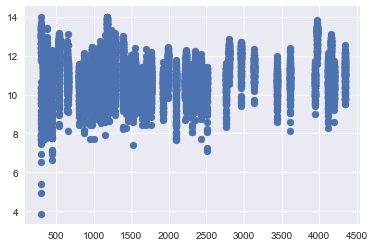

In [444]:
# explore relationship between variables and log_PAX
plt.scatter((X_df7.Distance),y_array)

# Testing models

In [1066]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_df10.values, y_array, test_size=0.2, random_state=0)

In [1067]:
X_train

array([[12.16, 9.33488082409, 40.69250106811523, ..., 0, 0, 0],
       [9.105263157889999, 5.820411753689999, 33.6367, ..., 0, 0, 0],
       [10.5263157895, 8.846646703400001, 33.43429946899414, ..., 0, 0,
        0],
       ...,
       [14.916666666700001, 13.061448973, 33.94250107, ..., 0, 0, 0],
       [10.4761904762, 7.2292395701, 42.212398529052734, ..., 0, 0, 0],
       [12.173913043499999, 8.54215309197, 40.63980103, ..., 0, 0, 0]],
      dtype=object)

In [885]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

n_estimators = 50
max_depth = 80
max_features = 30
min_samples_leaf = 1

reg = RandomForestRegressor(
    n_estimators=n_estimators, max_depth=max_depth, max_features=max_features,
    min_samples_leaf=min_samples_leaf)

scores = cross_val_score(
    reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print("RMSE: {:.4f} +/- {:.4f}".format(
    np.mean(np.sqrt(-scores)), np.std(np.sqrt(-scores))))




RMSE: 0.5008 +/- 0.0105


In [886]:
from sklearn import tree
import sklearn.ensemble

learning_rate=0.2
n_estimators=800
subsample=1
criterion='mse'
max_features=150

reg = sklearn.ensemble.GradientBoostingRegressor(learning_rate=learning_rate, n_estimators=n_estimators,
                                                subsample=subsample,criterion=criterion,max_features=max_features)


scores = cross_val_score(
    reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print("RMSE: {:.4f} +/- {:.4f}".format(
    np.mean(np.sqrt(-scores)), np.std(np.sqrt(-scores))))


RMSE: 0.3886 +/- 0.0087


Explore learning curve.

In [670]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,
    scoring = 'neg_mean_squared_error')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

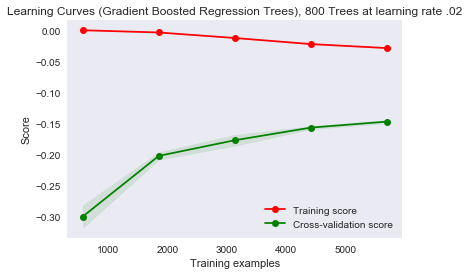

In [887]:

learning_rate=0.2
n_estimators=800
subsample=1
criterion='mse'
max_features=150

title = "Learning Curves (Gradient Boosted Regression Trees), 800 Trees at learning rate .02"
    
    
reg = sklearn.ensemble.GradientBoostingRegressor(learning_rate=learning_rate, 
                                                 n_estimators=n_estimators,
                                                subsample=subsample,criterion=criterion)

plot_learning_curve(reg, title, X_train, y_train, cv=5) 
plt.show() 

High variance? Try decreasing number of features and tunning hyperparameters -

In [917]:
# tunning hyper parameters
import sklearn.model_selection 

parameters = {
    #"learning_rate": [0.01, 0.025, 0.05, 0.1, 0.2,0.4],
    #"min_samples_split": np.linspace(0.1, 0.3, 6),
    "min_samples_leaf": [1,5,10],
    #"max_depth":[8,10,15],
    #"max_features":["log2","sqrt","auto"],
    #"criterion": ["friedman_mse",  "mse"],
    #"subsample":[0.5, 0.8, 1.0],
    #"n_estimators":[10,50,100,200]
    }

clf = sklearn.model_selection.GridSearchCV(
    sklearn.ensemble.GradientBoostingRegressor(random_state=5, 
                                              min_samples_split=0.1, criterion="mse",
                                              max_depth=10, max_features="auto",
                                              subsample=1), parameters, cv=5, 
    scoring='neg_mean_squared_error')

clf.fit(X_train, y_train)
# print(clf.score(X_train, y_train))
# print(clf.best_params_)
# print(clf.best_score_)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=10,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=0.1,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=5, subsample=1, verbose=0,
             warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': [1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [918]:
clf.best_params_

{'min_samples_leaf': 5}

In [919]:
pd.DataFrame(clf.cv_results_)

/Users/liulucy/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/liulucy/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/liulucy/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/liulucy/anaconda3/

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      10.953797      0.377401         0.037060        0.002378   
1      11.071724      0.566952         0.035276        0.000570   
2      10.751496      0.278255         0.035057        0.001467   

  param_min_samples_leaf                    params  split0_test_score  \
0                      1   {'min_samples_leaf': 1}          -0.177038   
1                      5   {'min_samples_leaf': 5}          -0.173890   
2                     10  {'min_samples_leaf': 10}          -0.183308   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0          -0.163168          -0.176088          -0.164481          -0.180910   
1          -0.162833          -0.174981          -0.163166          -0.178227   
2          -0.164280          -0.172980          -0.166544          -0.176132   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0        -0.172338        0.007147                2           -0.107320   
1        -0.170620        0.006383                1           -0.110567   
2        -0.172650        0.006830                3           -0.115152   

   split1_train_score  split2_train_score  split3_train_score  \
0           -0.105820           -0.109250           -0.104892   
1           -0.111975           -0.111478           -0.107137   
2           -0.115543           -0.112838           -0.112383   

   split4_train_score  mean_train_score  std_train_score  
0           -0.105628         -0.106582         0.001550  
1           -0.110683         -0.110368         0.001697  
2           -0.110866         -0.113356         0.001756

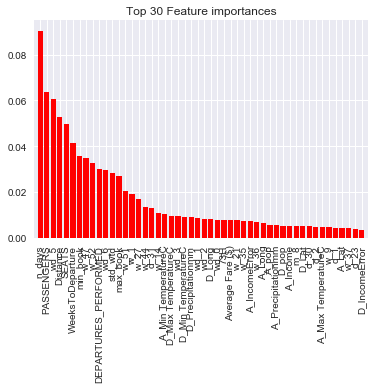

In [921]:
# feature importances

random_state=5
min_samples_split=0.1
criterion="mse"
max_depth=10
max_features="auto"
subsample=1
min_samples_leaf=5

reg = sklearn.ensemble.GradientBoostingRegressor(random_state=random_state,
                                                 min_samples_split=min_samples_split,
                                                 max_depth=max_depth,
                                                 max_features=max_features,
                                                 subsample=subsample,
                                                 min_samples_leaf=min_samples_leaf,
                                                 criterion=criterion)


reg.fit(X_train, y_train) 

# Calculate the feature ranking - Top 10 
importances = reg.feature_importances_ 

indices = np.argsort(importances)[::-1] 


indices=indices[:50] 
plt.figure() 
plt.title("Top 50 Feature importances") 

plt.bar(range(50), importances[indices], color="r", align="center") 

plt.xticks(range(50), X_df10.columns[indices], fontsize=10, rotation=90)


plt.xlim([-1, 50]) 

plt.show() 


Try removing low importance features to prevent overfitting. 

Didn't really improve model when tested, so used full data instead.

In [1069]:
from sklearn.feature_selection import SelectFromModel

# removing features
random_state=5
min_samples_split=0.1
criterion="mse"
max_depth=10
max_features="auto"
subsample=1
min_samples_leaf=5

reg = sklearn.ensemble.GradientBoostingRegressor(random_state=random_state,
                                                 min_samples_split=min_samples_split,
                                                 max_depth=max_depth,
                                                 max_features=max_features,
                                                 subsample=subsample,
                                                 min_samples_leaf=min_samples_leaf,
                                                 criterion=criterion)


reg.fit(X_train, y_train) 

sfm = SelectFromModel(reg, threshold=0.001, prefit=True)

In [1070]:
X_new = sfm.transform(X_train)

In [1091]:
# get indicies of selected columns
col_sel = SelectFromModel.get_support(sfm, indices=True)

In [1126]:
# to match X_train columns to X_df_out columns, must adjust the indicies
# (messy coding)
col_sel_sub = col_sel[col_sel < 105]
col_sel_sub = col_sel_sub-2
col_sel_sub = col_sel_sub[2:]

In [1129]:
col_sel_sub 

array([  0,   1,   2,   3,   4,   6,  13,  17,  20,  39,  42,  46,  47,
        48,  53,  54,  55,  57,  63,  69,  70,  72,  73,  74,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101])

In [1097]:
X_df_out_subset = X_df_out.iloc[:,col_sel_sub]

In [1103]:
X_df_out_indexcols = X_df_out[['DateOfDeparture','Departure','Arrival']]

In [1104]:
X_df_out_new = X_df_out.drop(['A_City','D_City','DateOfDeparture','Departure','Arrival'], axis=1)
X_df_out_new

A_Lat      A_Long      D_Lat      D_Long     Distance  Airline_4B  \
0      32.896801  -97.038002  41.978600  -87.904800  1290.645305           0   
1      39.861698 -104.672997  36.080101 -115.152000  1009.364619           0   
2      33.942501 -118.407997  39.861698 -104.672997  1385.139204           0   
3      41.978600  -87.904800  33.636700  -84.428101   976.327829           0   
4      37.618999 -122.375000  39.861698 -104.672997  1552.774831           0   
5      28.429399  -81.308998  33.636700  -84.428101   650.736345           0   
6      36.080101 -115.152000  37.618999 -122.375000   664.891520           0   
7      41.978600  -87.904800  40.692501  -74.168701  1154.453633           0   
8      35.214001  -80.943100  33.636700  -84.428101   364.567080           0   
9      39.861698 -104.672997  33.636700  -84.428101  1926.617830           0   
10     44.882000  -93.221802  33.636700  -84.428101  1459.718127           0   
11     40.692501  -74.168701  41.978600  -87.904800  1154.453633           0   
12     33.942501 -118.407997  29.984400  -95.341400  2215.073483           0   
13     41.978600  -87.904800  33.942501 -118.407997  2802.116008           0   
14     41.978600  -87.904800  32.896801  -97.038002  1290.645305           0   
15     39.861698 -104.672997  33.636700  -84.428101  1926.617830           0   
16     33.434299 -112.012001  41.978600  -87.904800  2313.425889           0   
17     37.618999 -122.375000  47.449001 -122.308998  1093.059560           0   
18     28.429399  -81.308998  40.692501  -74.168701  1510.881823           0   
19     44.882000  -93.221802  33.636700  -84.428101  1459.718127           0   
20     39.861698 -104.672997  37.618999 -122.375000  1552.774831           0   
21     42.212399  -83.353401  41.978600  -87.904800   376.388632           0   
22     25.793200  -80.290604  40.639801  -73.778900  1757.121516           0   
23     32.896801  -97.038002  39.871899  -75.241096  2092.876658           0   
24     42.364300  -71.005203  40.692501  -74.168701   322.306180           0   
25     39.871899  -75.241096  33.636700  -84.428101  1071.592953           0   
26     40.639801  -73.778900  36.080101 -115.152000  3609.282523           0   
27     40.692501  -74.168701  41.978600  -87.904800  1154.453633           0   
28     33.636700  -84.428101  39.871899  -75.241096  1071.592953           0   
29     37.618999 -122.375000  40.692501  -74.168701  4118.400578           0   
...          ...         ...        ...         ...          ...         ...   
11098  36.080101 -115.152000  41.978600  -87.904800  2431.692848           0   
11099  33.636700  -84.428101  25.793200  -80.290604   959.064560           0   
11100  47.449001 -122.308998  41.978600  -87.904800  2761.751624           0   
11101  40.777199  -73.872597  42.364300  -71.005203   296.692023           0   
11102  29.984400  -95.341400  41.978600  -87.904800  1490.651883           0   
11103  36.080101 -115.152000  41.978600  -87.904800  2431.692848           0   
11104  41.978600  -87.904800  47.449001 -122.308998  2761.751624           0   
11105  40.692501  -74.168701  28.429399  -81.308998  1510.881823           0   
11106  42.212399  -83.353401  33.636700  -84.428101   958.197591           0   
11107  33.942501 -118.407997  29.984400  -95.341400  2215.073483           0   
11108  33.942501 -118.407997  42.364300  -71.005203  4193.029087           0   
11109  33.636700  -84.428101  42.212399  -83.353401   958.197591           0   
11110  40.777199  -73.872597  42.212399  -83.353401   805.134837           0   
11111  37.618999 -122.375000  40.692501  -74.168701  4118.400578           0   
11112  32.896801  -97.038002  39.871899  -75.241096  2092.876658           0   
11113  39.861698 -104.672997  33.942501 -118.407997  1385.139204           0   
11114  32.896801  -97.038002  41.978600  -87.904800  1290.645305           0   
11115  42.212399  -83.353401  33.636700  -84.428101   958.197591           0   
11116  33.9

In [1130]:
X_df_out_new2 = X_df_out_new.iloc[:,col_sel_sub]

In [1133]:
X_df_out_new3 = pd.concat([X_df_out_indexcols,X_df_out_new2], axis=1)

In [1135]:
# write out reduced external data
# didn't improve model so didn't use in the end
X_df_out_new3.to_csv("test_subset_column.csv", index=False)

(Other models tried. All had higher CV scores - thus did not pursue)

In [287]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.kernel_ridge import KernelRidge

reg = KernelRidge(alpha=0.1)

scores = cross_val_score(
    reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print("RMSE: {:.4f} +/- {:.4f}".format(
    np.mean(np.sqrt(-scores)), np.std(np.sqrt(-scores))))

/Users/liulucy/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/liulucy/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/liulucy/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/liulucy/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/liulucy/a

RMSE: 0.5883 +/- 0.0417


In [623]:
from sklearn import linear_model


reg = linear_model.OrthogonalMatchingPursuit(n_nonzero_coefs=180)
scores = cross_val_score(
    reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print("RMSE: {:.4f} +/- {:.4f}".format(
    np.mean(np.sqrt(-scores)), np.std(np.sqrt(-scores))))

RMSE: 0.5288 +/- 0.0093


In [215]:
y_train

array([10.59973847, 10.91956718, 10.68649717, ..., 11.01843144,
       11.30011786,  9.52246452])

In [304]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

kernel = DotProduct() + WhiteKernel()

reg = GaussianProcessRegressor(
         random_state=0, alpha = 1)

scores = cross_val_score(
    reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print("RMSE: {:.4f} +/- {:.4f}".format(
    np.mean(np.sqrt(-scores)), np.std(np.sqrt(-scores))))

RMSE: 11.0201 +/- 0.0162


In [299]:
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
import sklearn.neighbors

reg = sklearn.neighbors.KNeighborsRegressor(n_neighbors=10)

scores = cross_val_score(
    reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print("RMSE: {:.4f} +/- {:.4f}".format(
    np.mean(np.sqrt(-scores)), np.std(np.sqrt(-scores))))


RMSE: 0.7901 +/- 0.0156


In [188]:
from sklearn import svm
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = svm.SVR()
clf.fit(X, y) 

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)